## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">CAPSTONE PROJECT : NLP - CHATBOT INTERFACE

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain: Industrial safety. NLP based Chatbot

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Description:
<font color=blue>
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Column Information:
<font color=blue>
<b>Data :</b>timestamp or time/date information
<br><b>Countries :</b>which country the accident occurred (anonymised)
<br><b>Local :</b>the city where the manufacturing plant is located (anonymised)
<br><b>Industry sector :</b>which sector the plant belongs to
<br><b>Accident level :</b>from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
<br><b>Potential Accident Level :</b>Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
<br><b>Genre :</b>if the person is male of female
<br><b>Employee or Third Party :</b>if the injured person is an employee or a third party
<br><b>Critical Risk :</b>some description of the risk involved in the accident
<br><b>Description :</b>Detailed description of how the accident happened
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=blue>
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description
</font>

- Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Load Dataset :

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/9Capstone/IHMStefanini_database.csv")
df.head()

Unnamed: 0  ...                                        Description
0           0  ...  While removing the drill rod of the Jumbo 08 f...
1           1  ...  During the activation of a sodium sulphide pum...
2           2  ...  In the sub-station MILPO located at level +170...
3           3  ...  Being 9:45 am. approximately in the Nv. 1880 C...
4           4  ...  Approximately at 11:45 a.m. in circumstances t...

[5 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [5]:
df.isna().values.any()

False

In [6]:
df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [7]:
df.nunique()

Unnamed: 0                  425
Data                        287
Countries                     3
Local                        12
Industry Sector               3
Accident Level                5
Potential Accident Level      6
Genre                         2
Employee or Third Party       3
Critical Risk                33
Description                 411
dtype: int64

In [8]:
for column in df.columns[2:10]:
    print(column)
    print(df[column].unique())
    print('-------------')

Countries
['Country_01' 'Country_02' 'Country_03']
-------------
Local
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-------------
Industry Sector
['Mining' 'Metals' 'Others']
-------------
Accident Level
['I' 'IV' 'III' 'II' 'V']
-------------
Potential Accident Level
['IV' 'III' 'I' 'II' 'V' 'VI']
-------------
Genre
['Male' 'Female']
-------------
Employee or Third Party
['Third Party' 'Employee' 'Third Party (Remote)']
-------------
Critical Risk
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipm

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(2)

Date  ...                                        Description
0  2016-01-01 00:00:00  ...  While removing the drill rod of the Jumbo 08 f...
1  2016-01-02 00:00:00  ...  During the activation of a sodium sulphide pum...

[2 rows x 10 columns]

- Add Columns on Date attribute :

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['MonthName'] = df['Date'].apply(lambda x : x.month_name())
df.head()

Date     Country     Local  ... WeekofYear    Weekday MonthName
0 2016-01-01  Country_01  Local_01  ...         53     Friday   January
1 2016-01-02  Country_02  Local_02  ...         53   Saturday   January
2 2016-01-06  Country_01  Local_03  ...          1  Wednesday   January
3 2016-01-08  Country_01  Local_04  ...          1     Friday   January
4 2016-01-10  Country_01  Local_04  ...          1     Sunday   January

[5 rows x 16 columns]

- In general the Season or Weather also a major contributor for any incidents, like Winter invite cold related issues, Summer invite hot stroke related health and safety concers, Monsoon invite slippery kind of safety issues, etc

- Let's develop the column that identify season when incident occured

- The data is collected from Brazil which is located in the Southern Hemisphere, its seasons are the exact opposite of what Northern Hemisphere residents.

  - Summer is December through Febraury

  - Autumn is March through May

  - Winter is June through August

  - Spring is Septemner through November

Within the country the climate varies considerably from region to region.

In [7]:
def seasonofyear(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

df['Season'] = df['Month'].apply(seasonofyear)

In [12]:
df.tail()

Date     Country     Local  ...    Weekday MonthName  Season
420 2017-07-04  Country_01  Local_04  ...    Tuesday      July  Winter
421 2017-07-04  Country_01  Local_03  ...    Tuesday      July  Winter
422 2017-07-05  Country_02  Local_09  ...  Wednesday      July  Winter
423 2017-07-06  Country_02  Local_05  ...   Thursday      July  Winter
424 2017-07-09  Country_01  Local_04  ...     Sunday      July  Winter

[5 rows x 17 columns]

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">EDA :
<font color=darkblue>
</font>

In [14]:
# function for distribution, frequency plot
def UnivariatePlot(aCol):
    aBar = df[aCol]
    aSeries = df.groupby(aCol)['Accident Level'].count()
    aLabel = aSeries.keys()  #df_accidents[aCol]
    aUnique = df[aCol].nunique()
    
    plt.figure(figsize= (14,7))
    
    # bar char showing count
    plt.subplot(1, 2, 1)
    plt.title(aCol + ' Count', fontsize=14)
    plt.xlabel(aCol, fontsize=13)
    plt.ylabel('Total number of Accidents', fontsize=13)
    ax = sns.countplot(aBar, data=df)    
    plt.tick_params(labelsize=13)
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    # pie chart showing percentage
    plt.subplot(1, 2, 2)
    plt.title(aCol + ' Percentage', fontsize=14)
    plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, startangle=90)
    # plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, rotatelabels =False, startangle=180, counterclock=True)
    plt.axis('equal')
    

    plt.show()

- Analysis of few key features :

ANALYSIS BY Country:


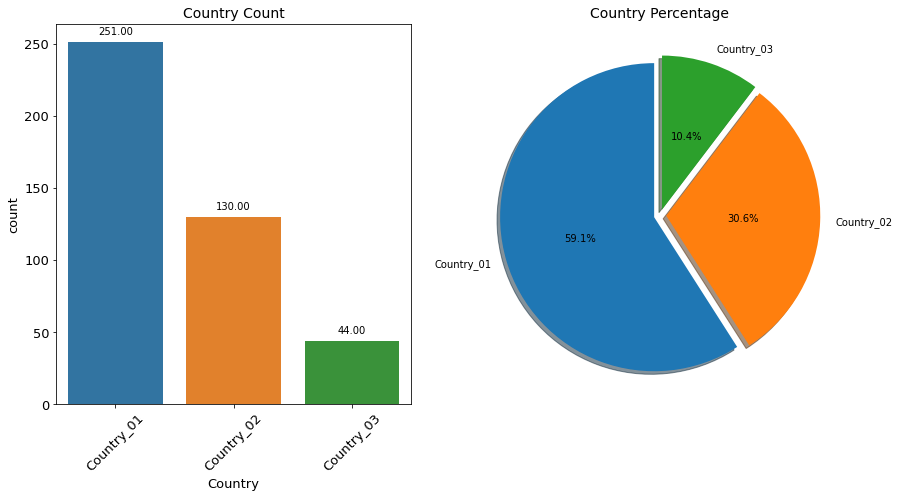

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Employee type:


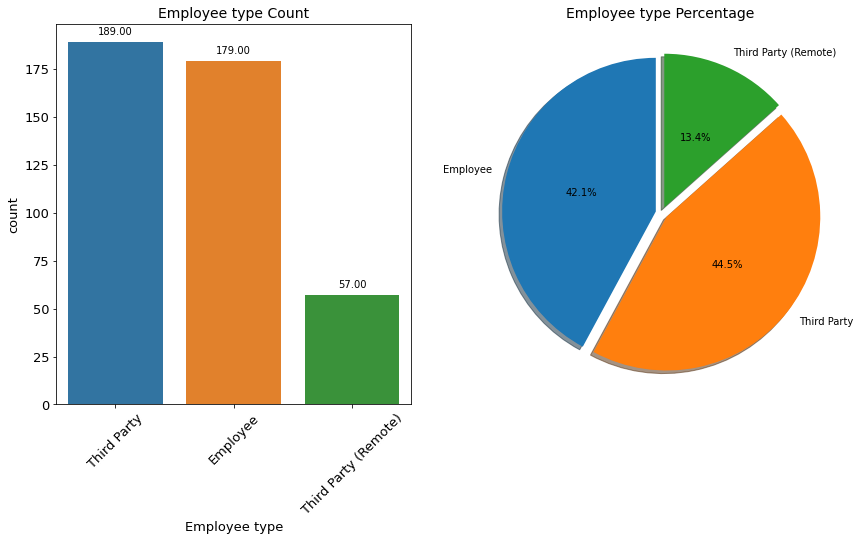

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Gender:


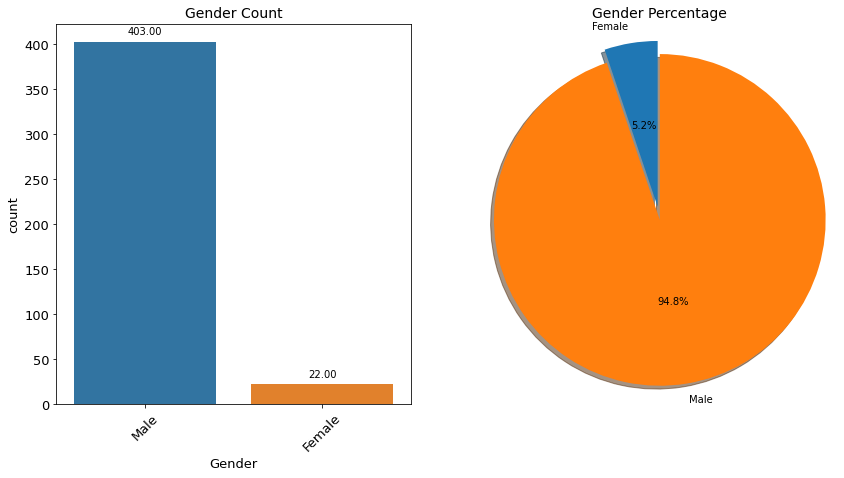

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Local:


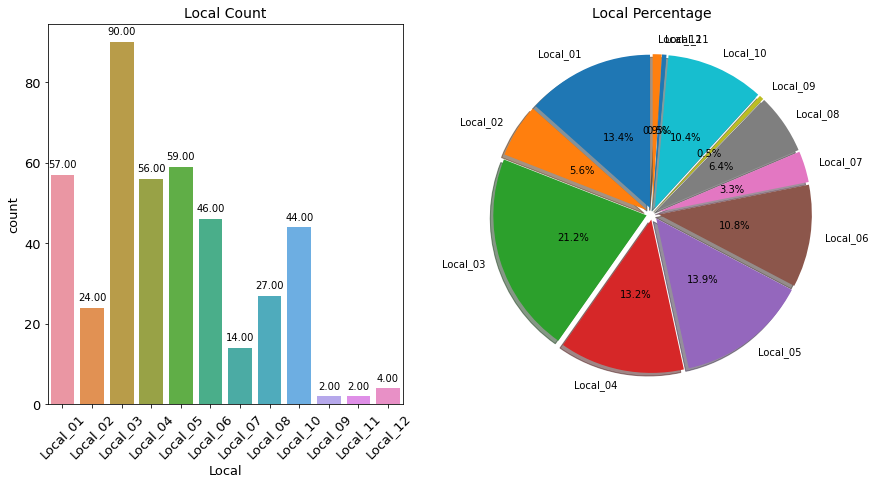

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Industry Sector:


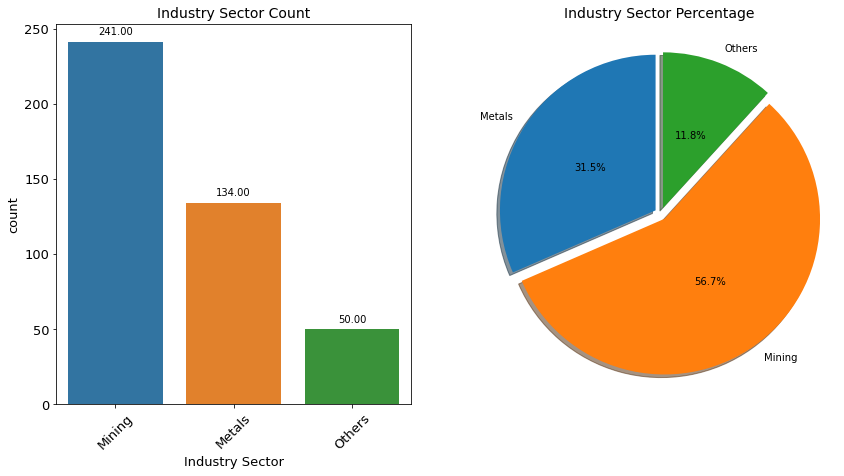

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Accident Level:


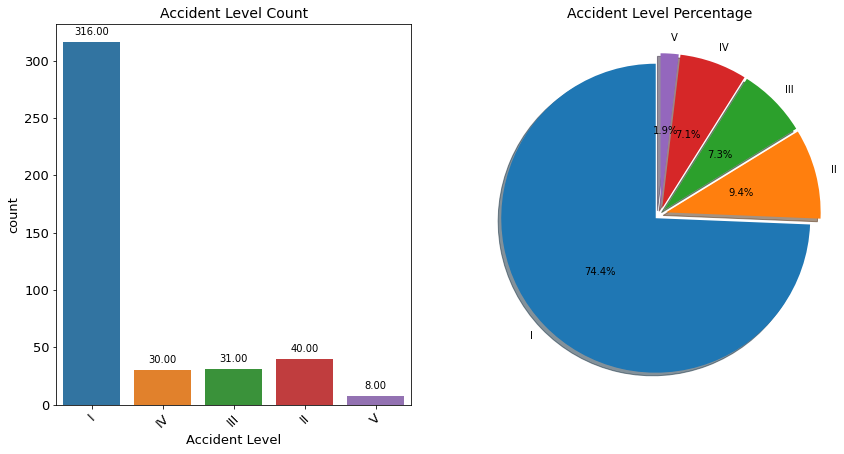

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Potential Accident Level:


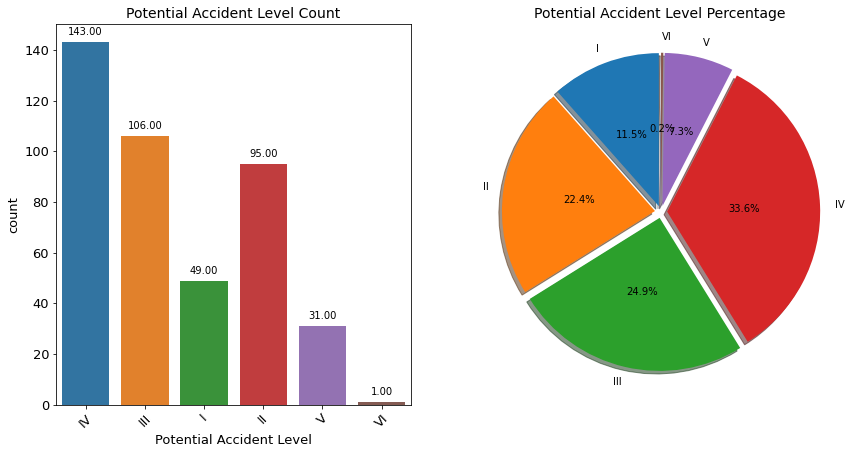

-----------------------------------------------------------------------------------------------------
ANALYSIS BY Critical Risk:


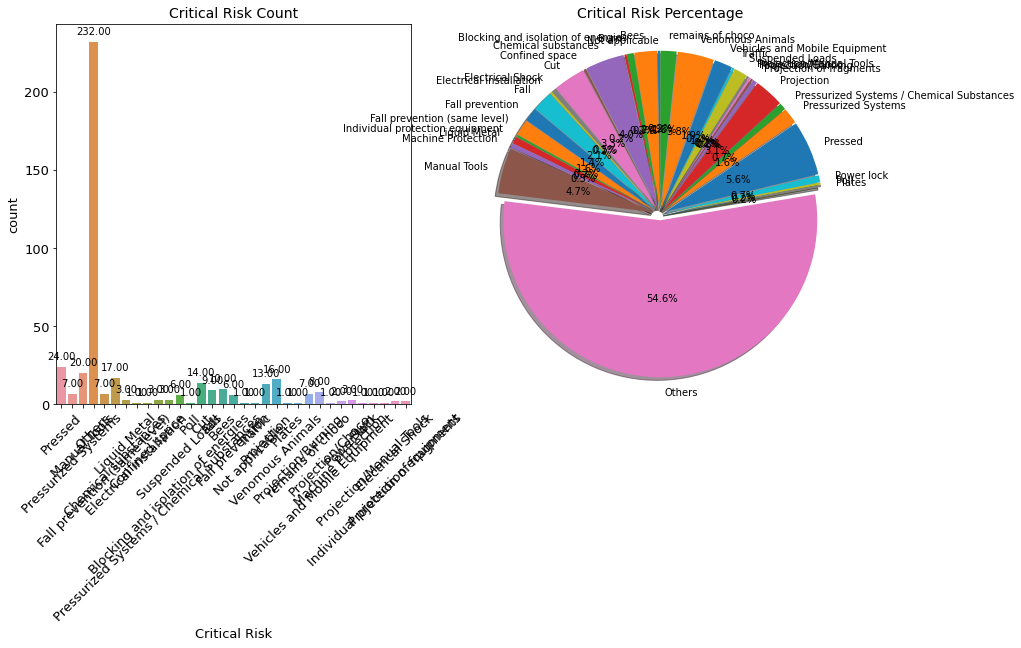

-----------------------------------------------------------------------------------------------------


In [15]:
for column in ['Country', 'Employee type','Gender','Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level','Critical Risk']:
    print('ANALYSIS BY ' + column + ':')
    UnivariatePlot(column)
    print('-----------------------------------------------------------------------------------------------------')

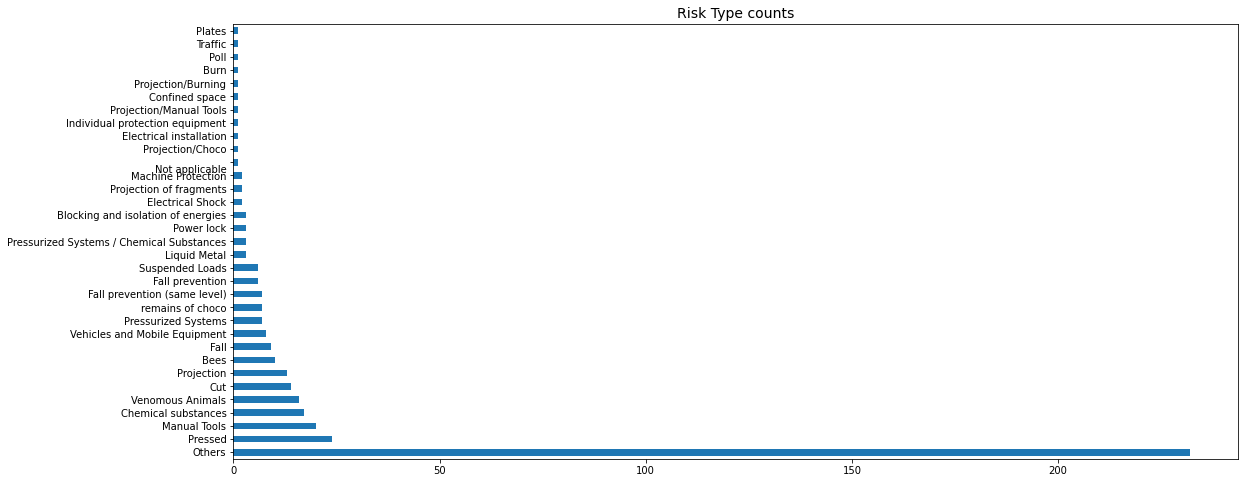

In [16]:
df_rt = df["Critical Risk"].value_counts()
plt.figure(figsize=(18,8))
df_rt.plot.barh();
plt.title("Risk Type counts", fontsize=14);

- Observation :
    - Country_01 recorded with highest incident (59%) amongst all 3 countries

    - Country_03 recorded lowest (10.4%) amongst all 3 countires

    - Total 12 localities data from 3 countries captured**

    - Local_03 recorded with highest incident amongst all 12 countries**

    - 9 out of 12 localities have double digit incidents**

    - 3 localities have single digit low incidents**

    - Total 3 Industrial sectors covered

    - Mining recorded with highest incident - 56.7%

    - Metals stands high next to Mining Sector - 31.5%

    - Other sectors contribute lowest incidents - 11.8%

    - Accident Level - I occured at high frequency 74.4%

    - Accident Level - V occured at low frequency 1.9%

    - High Level accidents are lower and Low Level accidents are higher

    - Predicted Potential Accident Level - IV is at high frequency 33.6%

    - Predicted Potential Accident Level - VI is just 1 occasio - 0.2%

    - Actual Accident levels are different than Predicted Potential Accident Level

    - Males are high prone to exposed to Accident (94.8% compare to Females (5.2%)

    - Third Party Employees and Direct Employees are more prone to Accident than Remote working third party

    - Accidents are categories into 33 types of Risk Types

    - Undefined other type of Risks contribute to 54.6% accident

    - It indicates deep investigation and proactive approaches - FMEA/RCA are needed to identify the type of risks



- Analysis by time of the year that is Weekday, Month  and Season:

ANALYSIS BY Year:


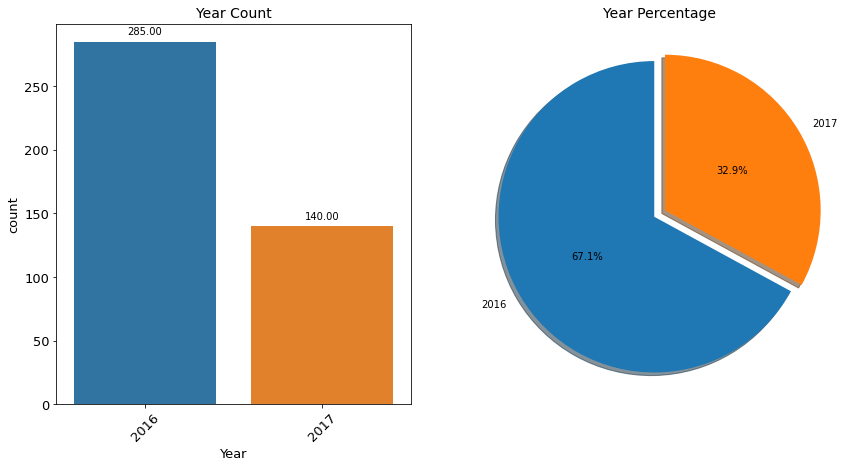

------------------------------------
ANALYSIS BY Month:


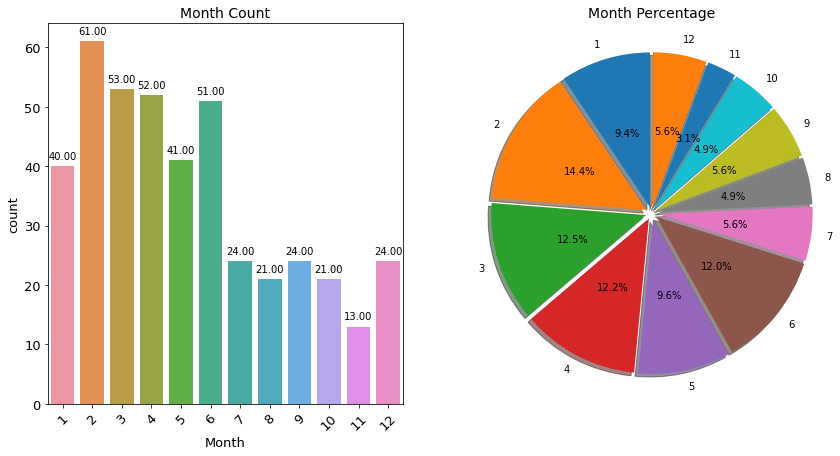

------------------------------------
ANALYSIS BY Day:


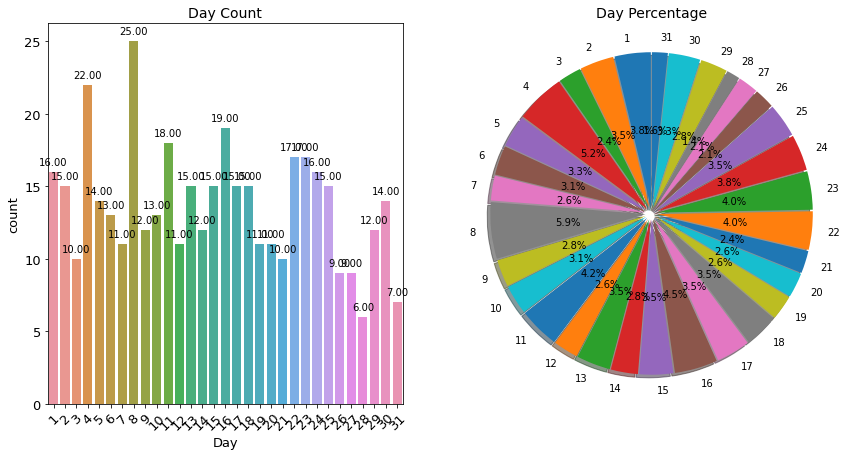

------------------------------------
ANALYSIS BY WeekofYear:


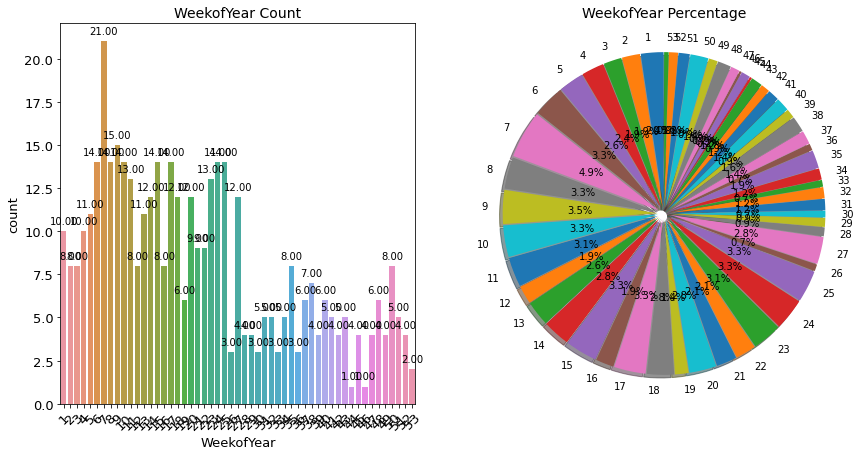

------------------------------------
ANALYSIS BY Weekday:


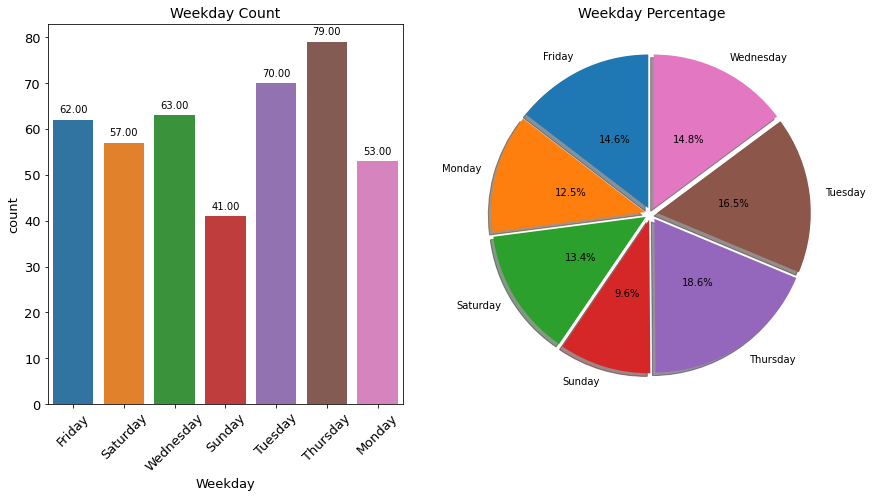

------------------------------------
ANALYSIS BY MonthName:


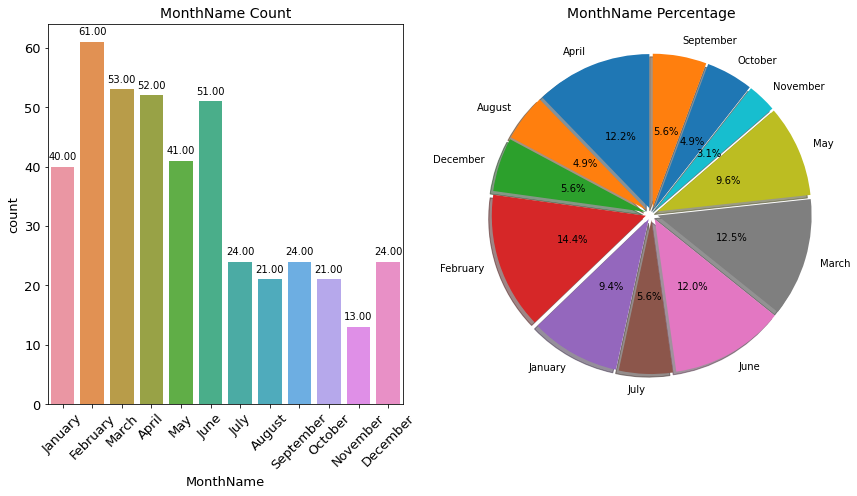

------------------------------------
ANALYSIS BY Season:


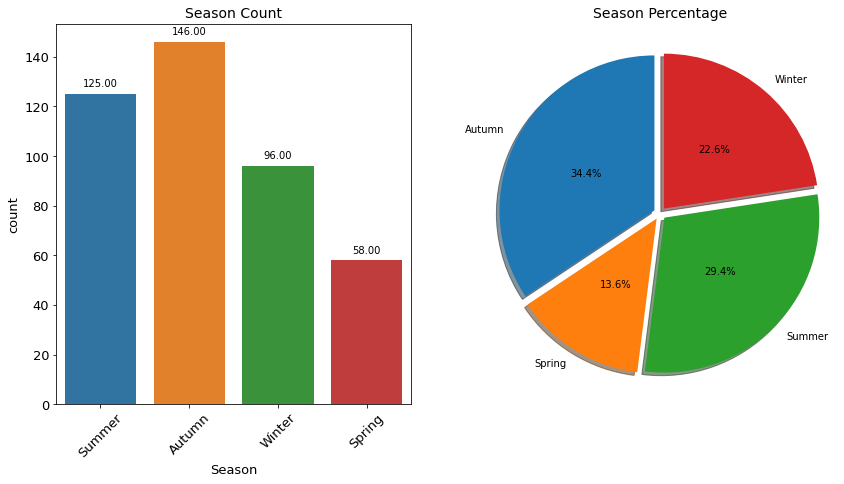

------------------------------------


In [17]:
for column in df.columns[10:18]:
    print('ANALYSIS BY ' + column + ':')
    UnivariatePlot(column)
    print('------------------------------------')

- Observations: 
  - Y-2017 Accident is halved Y-2016 - Good controls in Accidents and safety performance

  - In general Accident occurs through the year irrespective of months

  - However in the month of Feb and Apr accident level is high

  - July, Oct & Dec have 50% of reduced accident level than Feb & Apr

  - Beginning of every month have more accidents.

  - End of the the month relatively accidents are at lower side

  - Except Sunday all other days there is a accident

  - However Sunday also Accident occurs

  - Almost equal amount of accident occurs across all seasons except Spring


- Bivariate Analysis: 

In [18]:
# Bivariate analysis on Accident Level/Potential Accident levels
def BivariatePlot(aCol):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(aCol.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 45)

    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(aCol.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 45)

    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
    return plt.show()

ANALYSIS BY Country on Accident Level / Potential Accident Level:


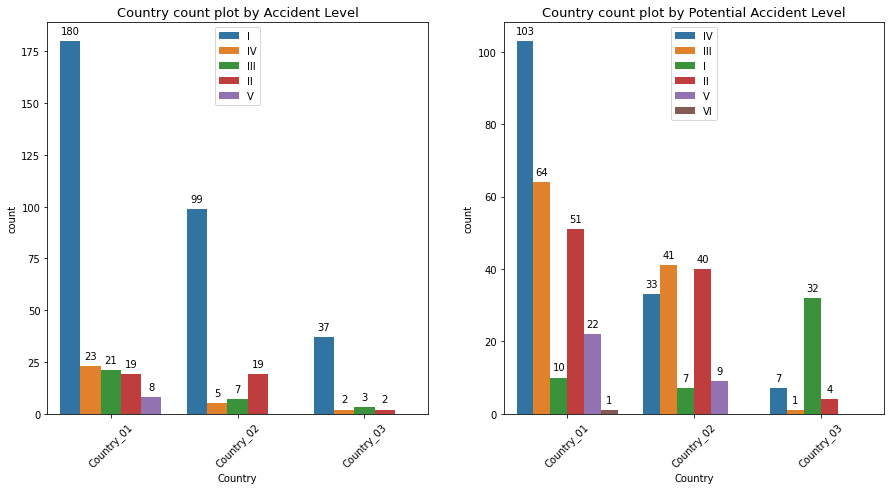

----------------------------------------------------------------------------
ANALYSIS BY Gender on Accident Level / Potential Accident Level:


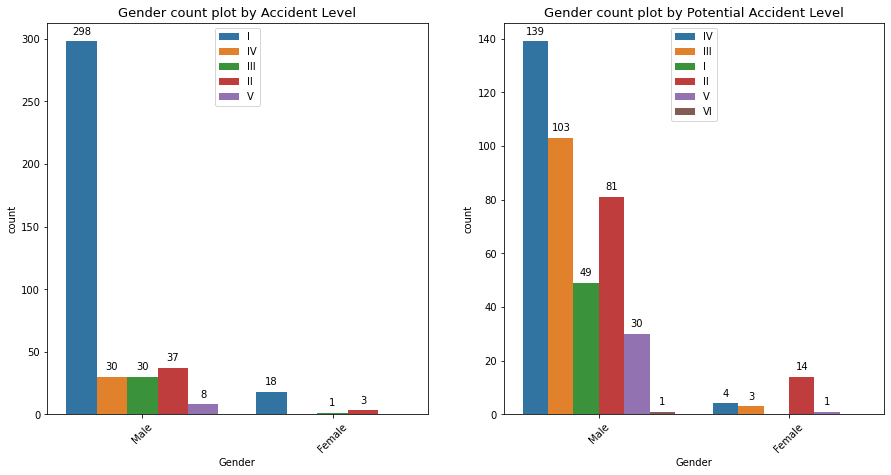

----------------------------------------------------------------------------
ANALYSIS BY Industry Sector on Accident Level / Potential Accident Level:


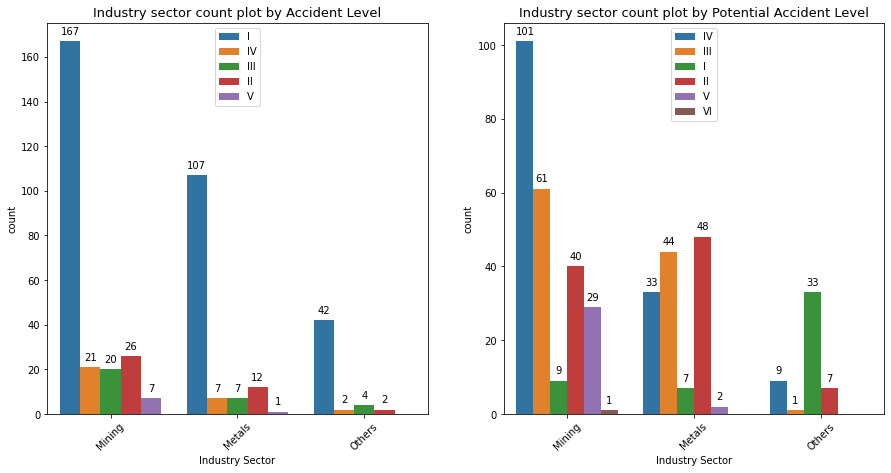

----------------------------------------------------------------------------
ANALYSIS BY Employee type on Accident Level / Potential Accident Level:


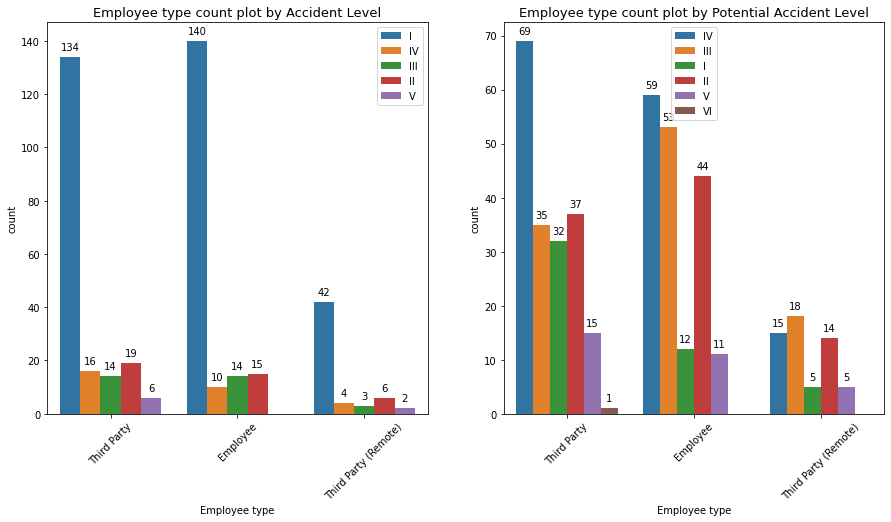

----------------------------------------------------------------------------
ANALYSIS BY Month on Accident Level / Potential Accident Level:


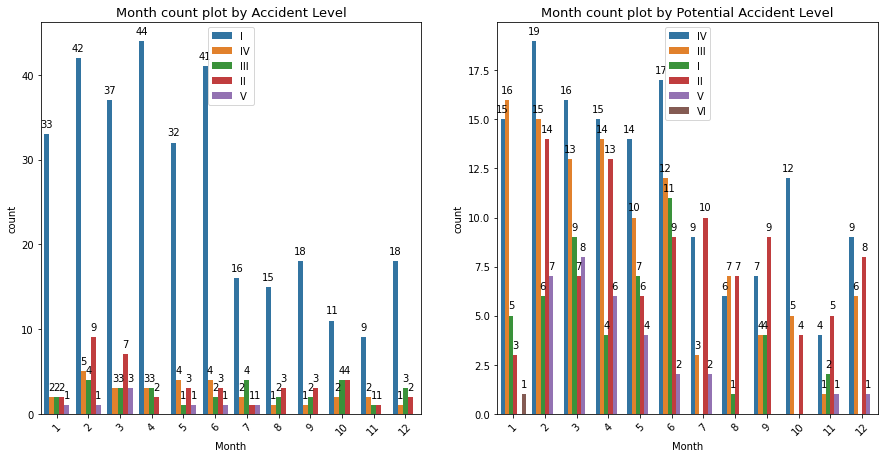

----------------------------------------------------------------------------
ANALYSIS BY Season on Accident Level / Potential Accident Level:


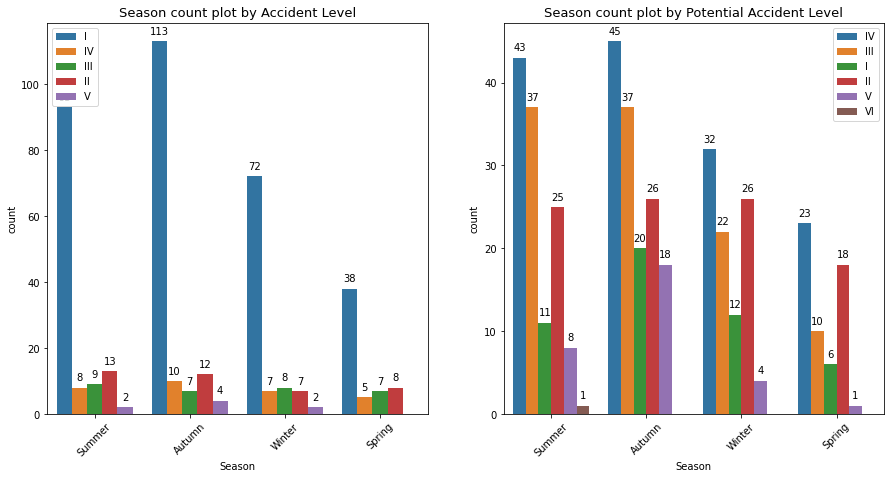

----------------------------------------------------------------------------
ANALYSIS BY Weekday on Accident Level / Potential Accident Level:


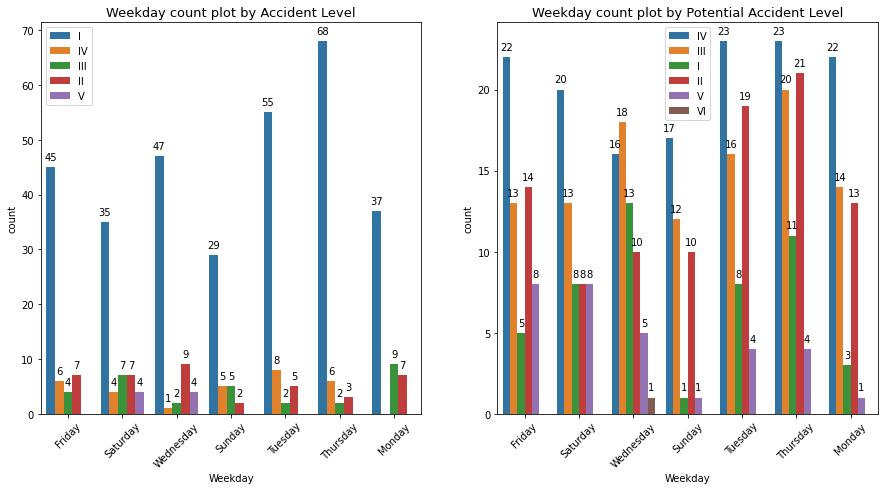

----------------------------------------------------------------------------


In [19]:
for column in ['Country', 'Gender', 'Industry Sector', 'Employee type', 'Month', 'Season', 'Weekday']:
    print('ANALYSIS BY ' + column + ' on Accident Level / Potential Accident Level:')
    BivariatePlot(column)
    print('----------------------------------------------------------------------------')

Text(0.5, 1.0, 'By Empl type')

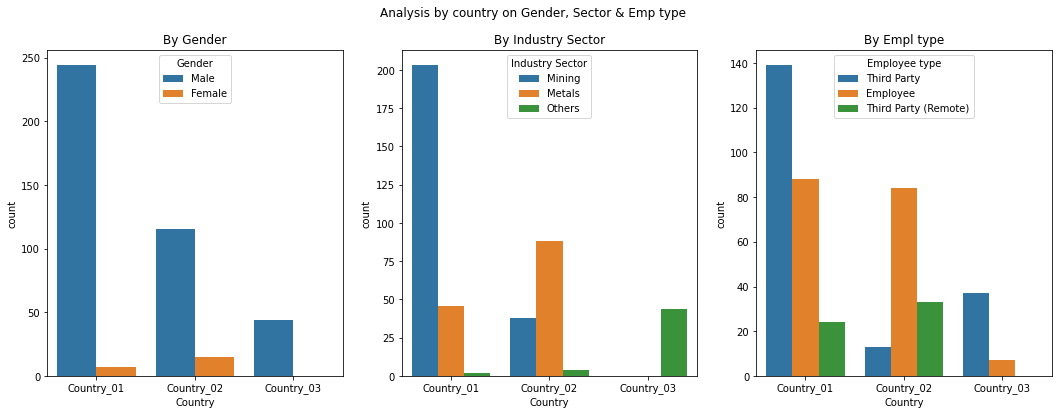

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('Analysis by country on Gender, Sector & Emp type')

# column ='Gender'
sns.countplot(x="Country", data=df , hue= 'Gender', ax=axes[0])
axes[0].set_title('By Gender')

# column ='Industry Sector'
sns.countplot(x="Country", data=df , hue= 'Industry Sector', ax=axes[1])
axes[1].set_title('By Industry Sector')

# column ='Employee type'
sns.countplot(x="Country", data=df , hue= 'Employee type', ax=axes[2])
axes[2].set_title('By Empl type')

Text(0.5, 1.0, 'Analysis by Employee Type on Gender:')

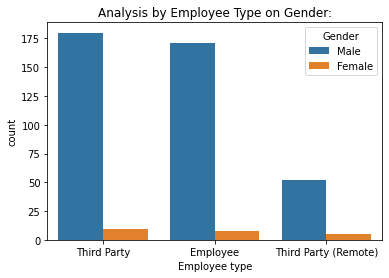

In [21]:
ax = sns.countplot(x="Employee type", data=df, hue="Gender")
ax.set_title("Analysis by Employee Type on Gender:")

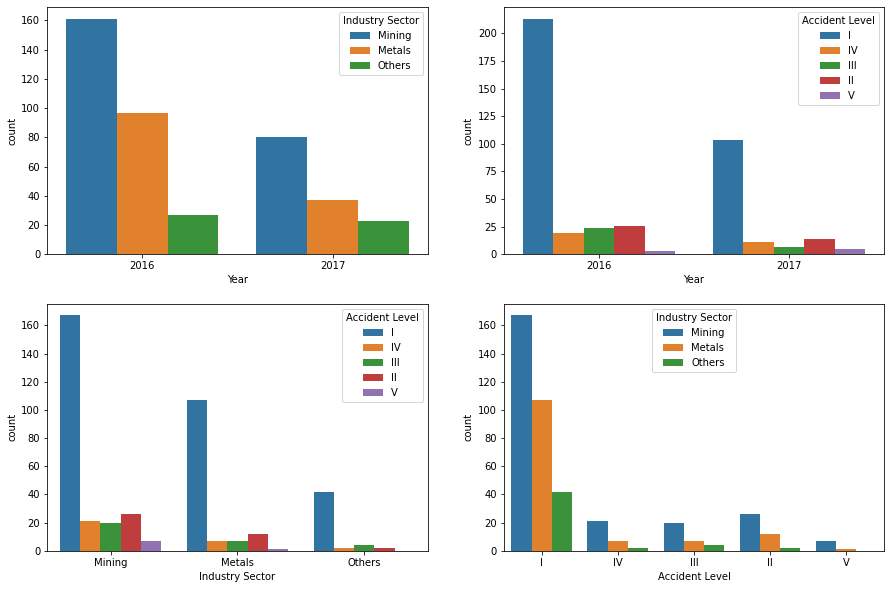

In [22]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df['Year'], hue='Industry Sector', data=df,ax=axs[0][0])
sns.countplot(x=df['Year'], hue='Accident Level', data=df,ax=axs[0][1])
sns.countplot(x=df['Industry Sector'], hue='Accident Level', data=df,ax=axs[1][0])
sns.countplot(x=df['Accident Level'], hue='Industry Sector', data=df,ax=axs[1][1])

## Multivariate Analysis

-  Label Encoding of Categorical columns:

In [8]:
df_accidents = df

In [9]:
cat_columns_replace = {"Country":     {"Country_01": 1, "Country_02": 2, "Country_03": 3},
                  "Local":       {"Local_01": 1, "Local_02": 2, "Local_03": 3, "Local_04": 4,"Local_05": 5, "Local_06": 6, 
                                  "Local_07": 7, "Local_08": 8, "Local_09": 9, "Local_10": 10, "Local_11": 11, "Local_12": 12 },
                  "Industry Sector": {"Metals": 1, "Mining": 2, "Others": 3},
                  "Accident Level" : {"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5},
                  "Potential Accident Level" : {"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5, "VI": 6},
                  "Gender": {"Male": 1, "Female": 0},
                  "Employee type" : {"Employee": 1, "Third Party": 2, "Third Party (Remote)": 3},
                  "Weekday": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7},
                  "Season": {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4}
                 }

In [10]:
df_accidents_clean = df_accidents.replace(cat_columns_replace)

#to encode Critical Risk column
from sklearn.preprocessing import LabelEncoder
df_accidents_clean['Risk Type'] = LabelEncoder().fit_transform(df_accidents['Critical Risk'])

In [11]:
df_accidents_clean.head(3)

Date  Country  Local  ...  MonthName  Season  Risk Type
0 2016-01-01        1      1  ...    January       2         20
1 2016-01-02        2      2  ...    January       2         21
2 2016-01-06        1      3  ...    January       2         15

[3 rows x 18 columns]

In [12]:
df_accidents_plot = df_accidents_clean.drop(labels=['Date','Critical Risk', 'Description', 'Year', 'WeekofYear', 'MonthName'], 
                                            axis=1)

In [13]:
df_accidents_plot.shape

(425, 12)

In [14]:
df_accidents_plot.head(3)

Country  Local  Industry Sector  ...  Weekday  Season  Risk Type
0        1      1                2  ...        5       2         20
1        2      2                2  ...        6       2         21
2        1      3                2  ...        3       2         15

[3 rows x 12 columns]

<Figure size 720x480 with 0 Axes>

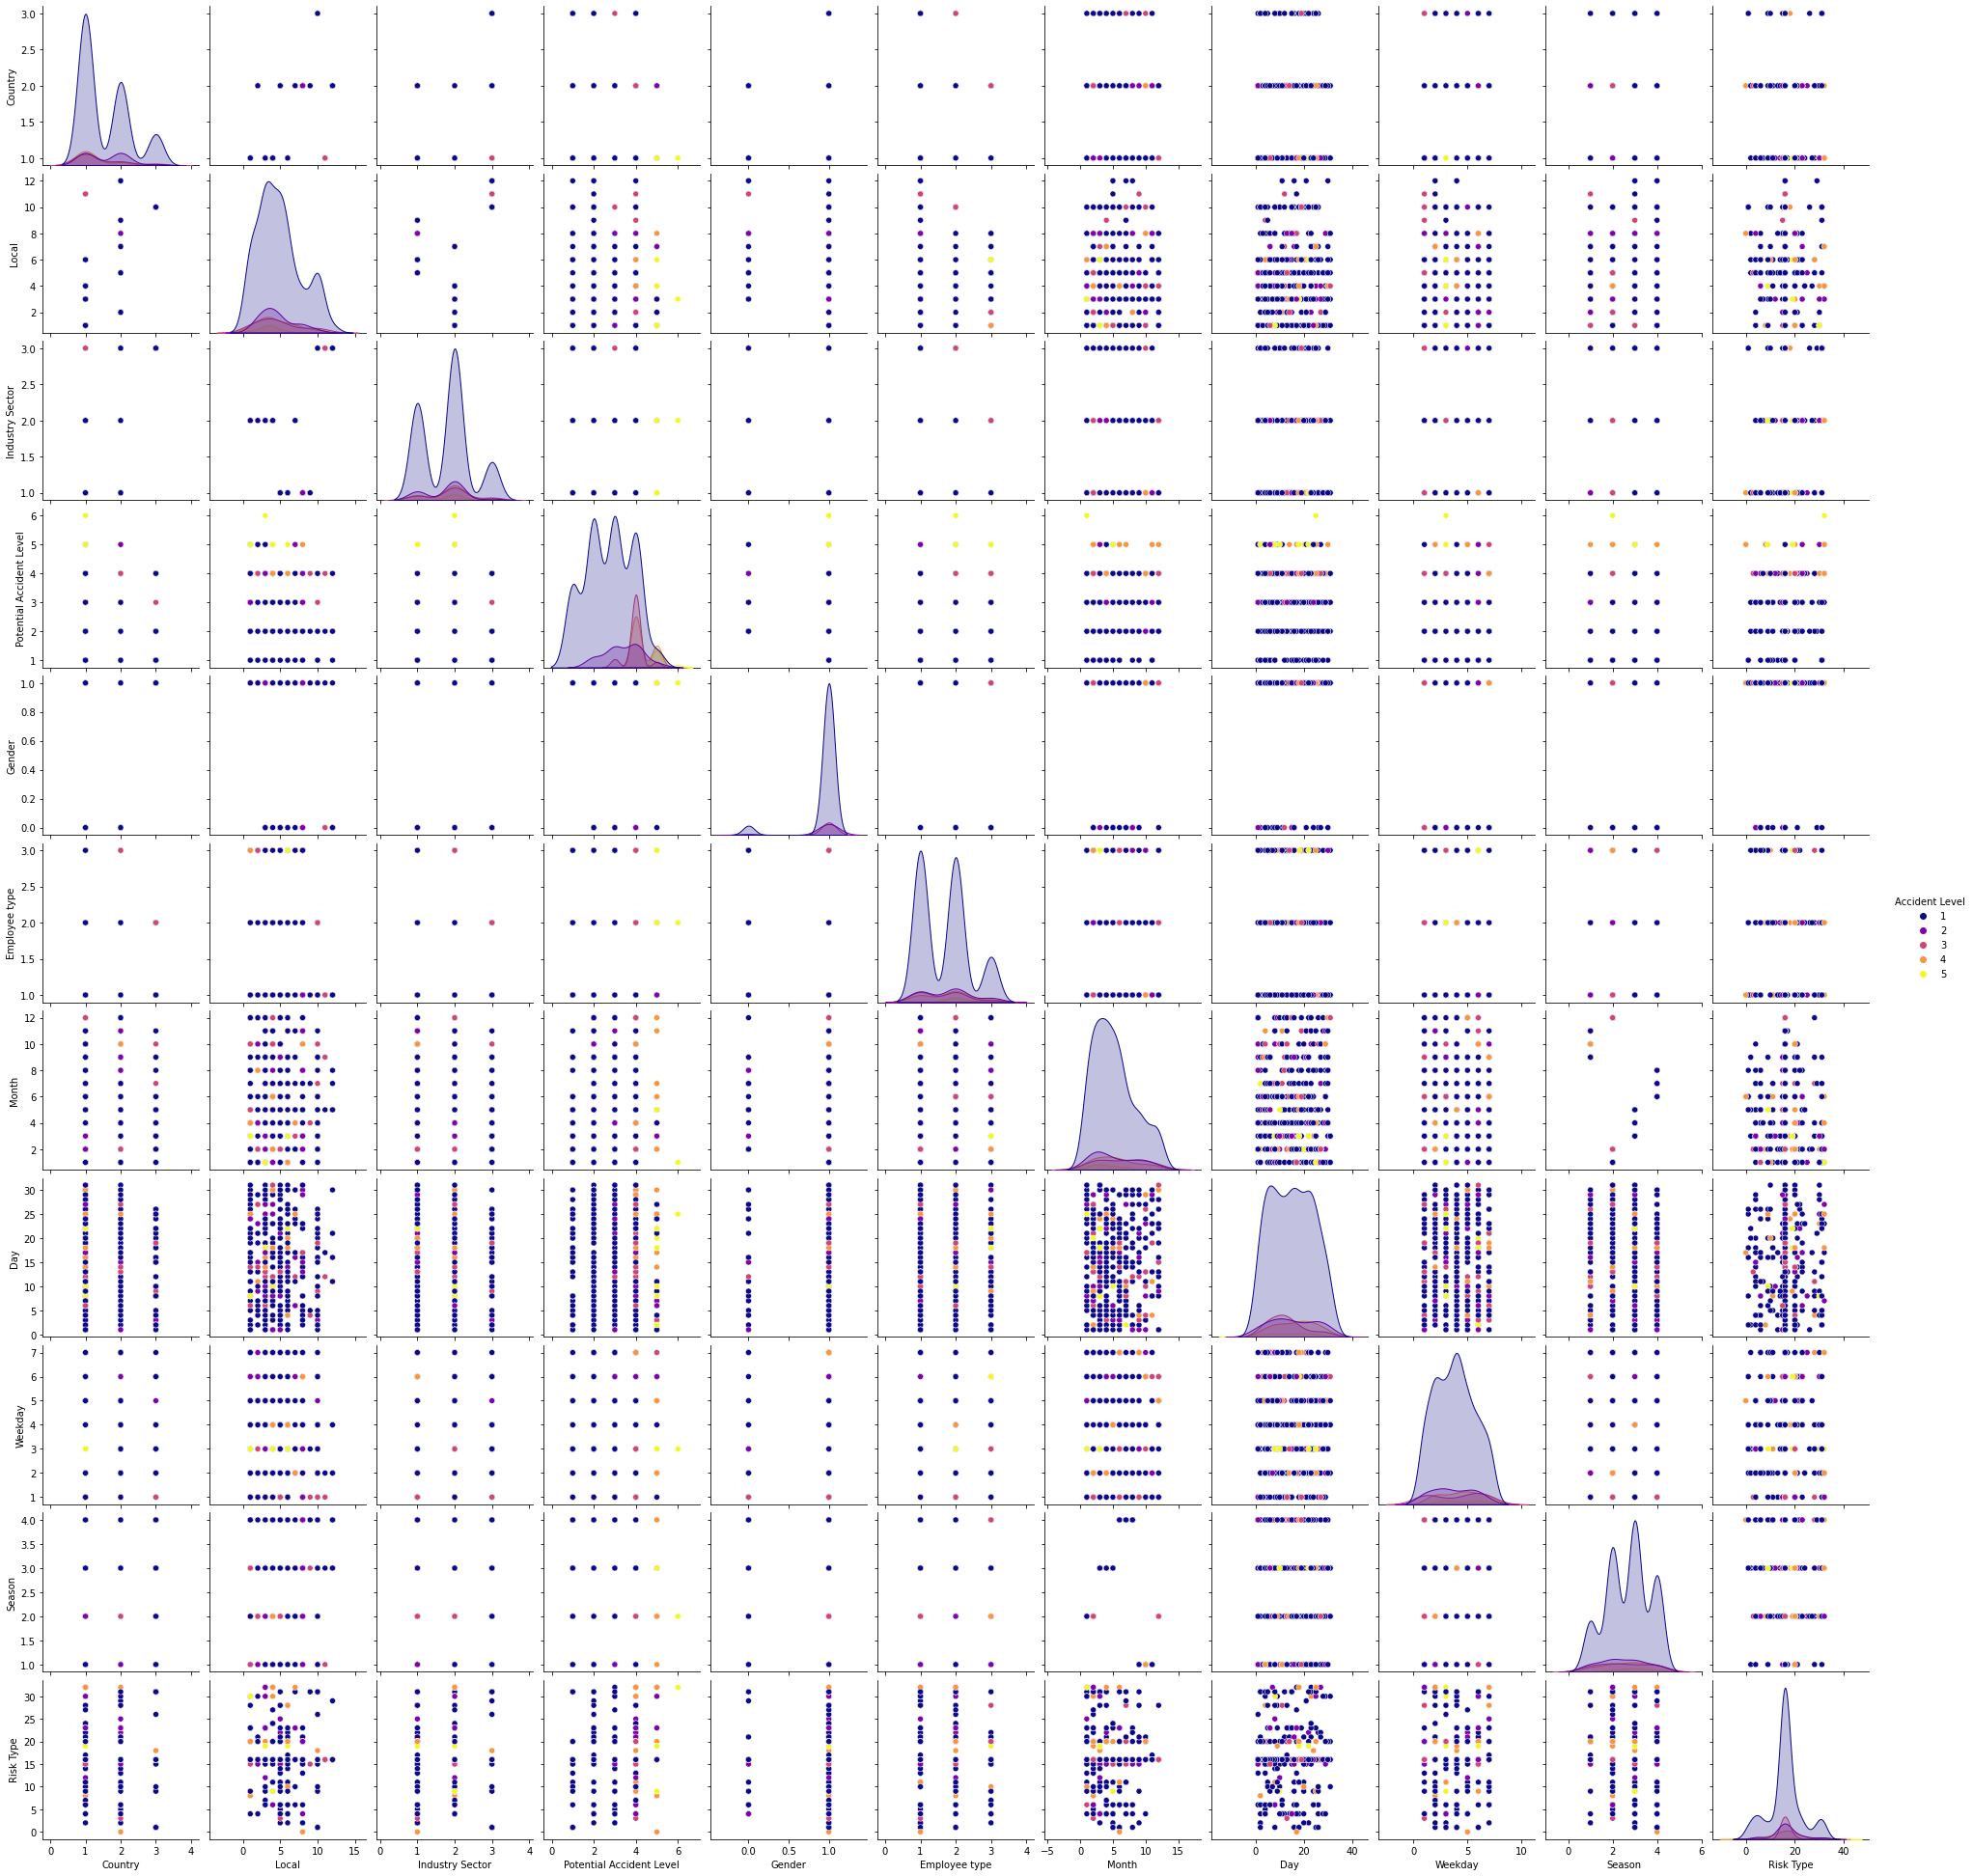

In [30]:
plt.figure(dpi=120)
sns.pairplot(df_accidents_plot, hue='Accident Level', diag_kind='kde', palette = 'plasma')
plt.show()

<Figure size 720x480 with 0 Axes>

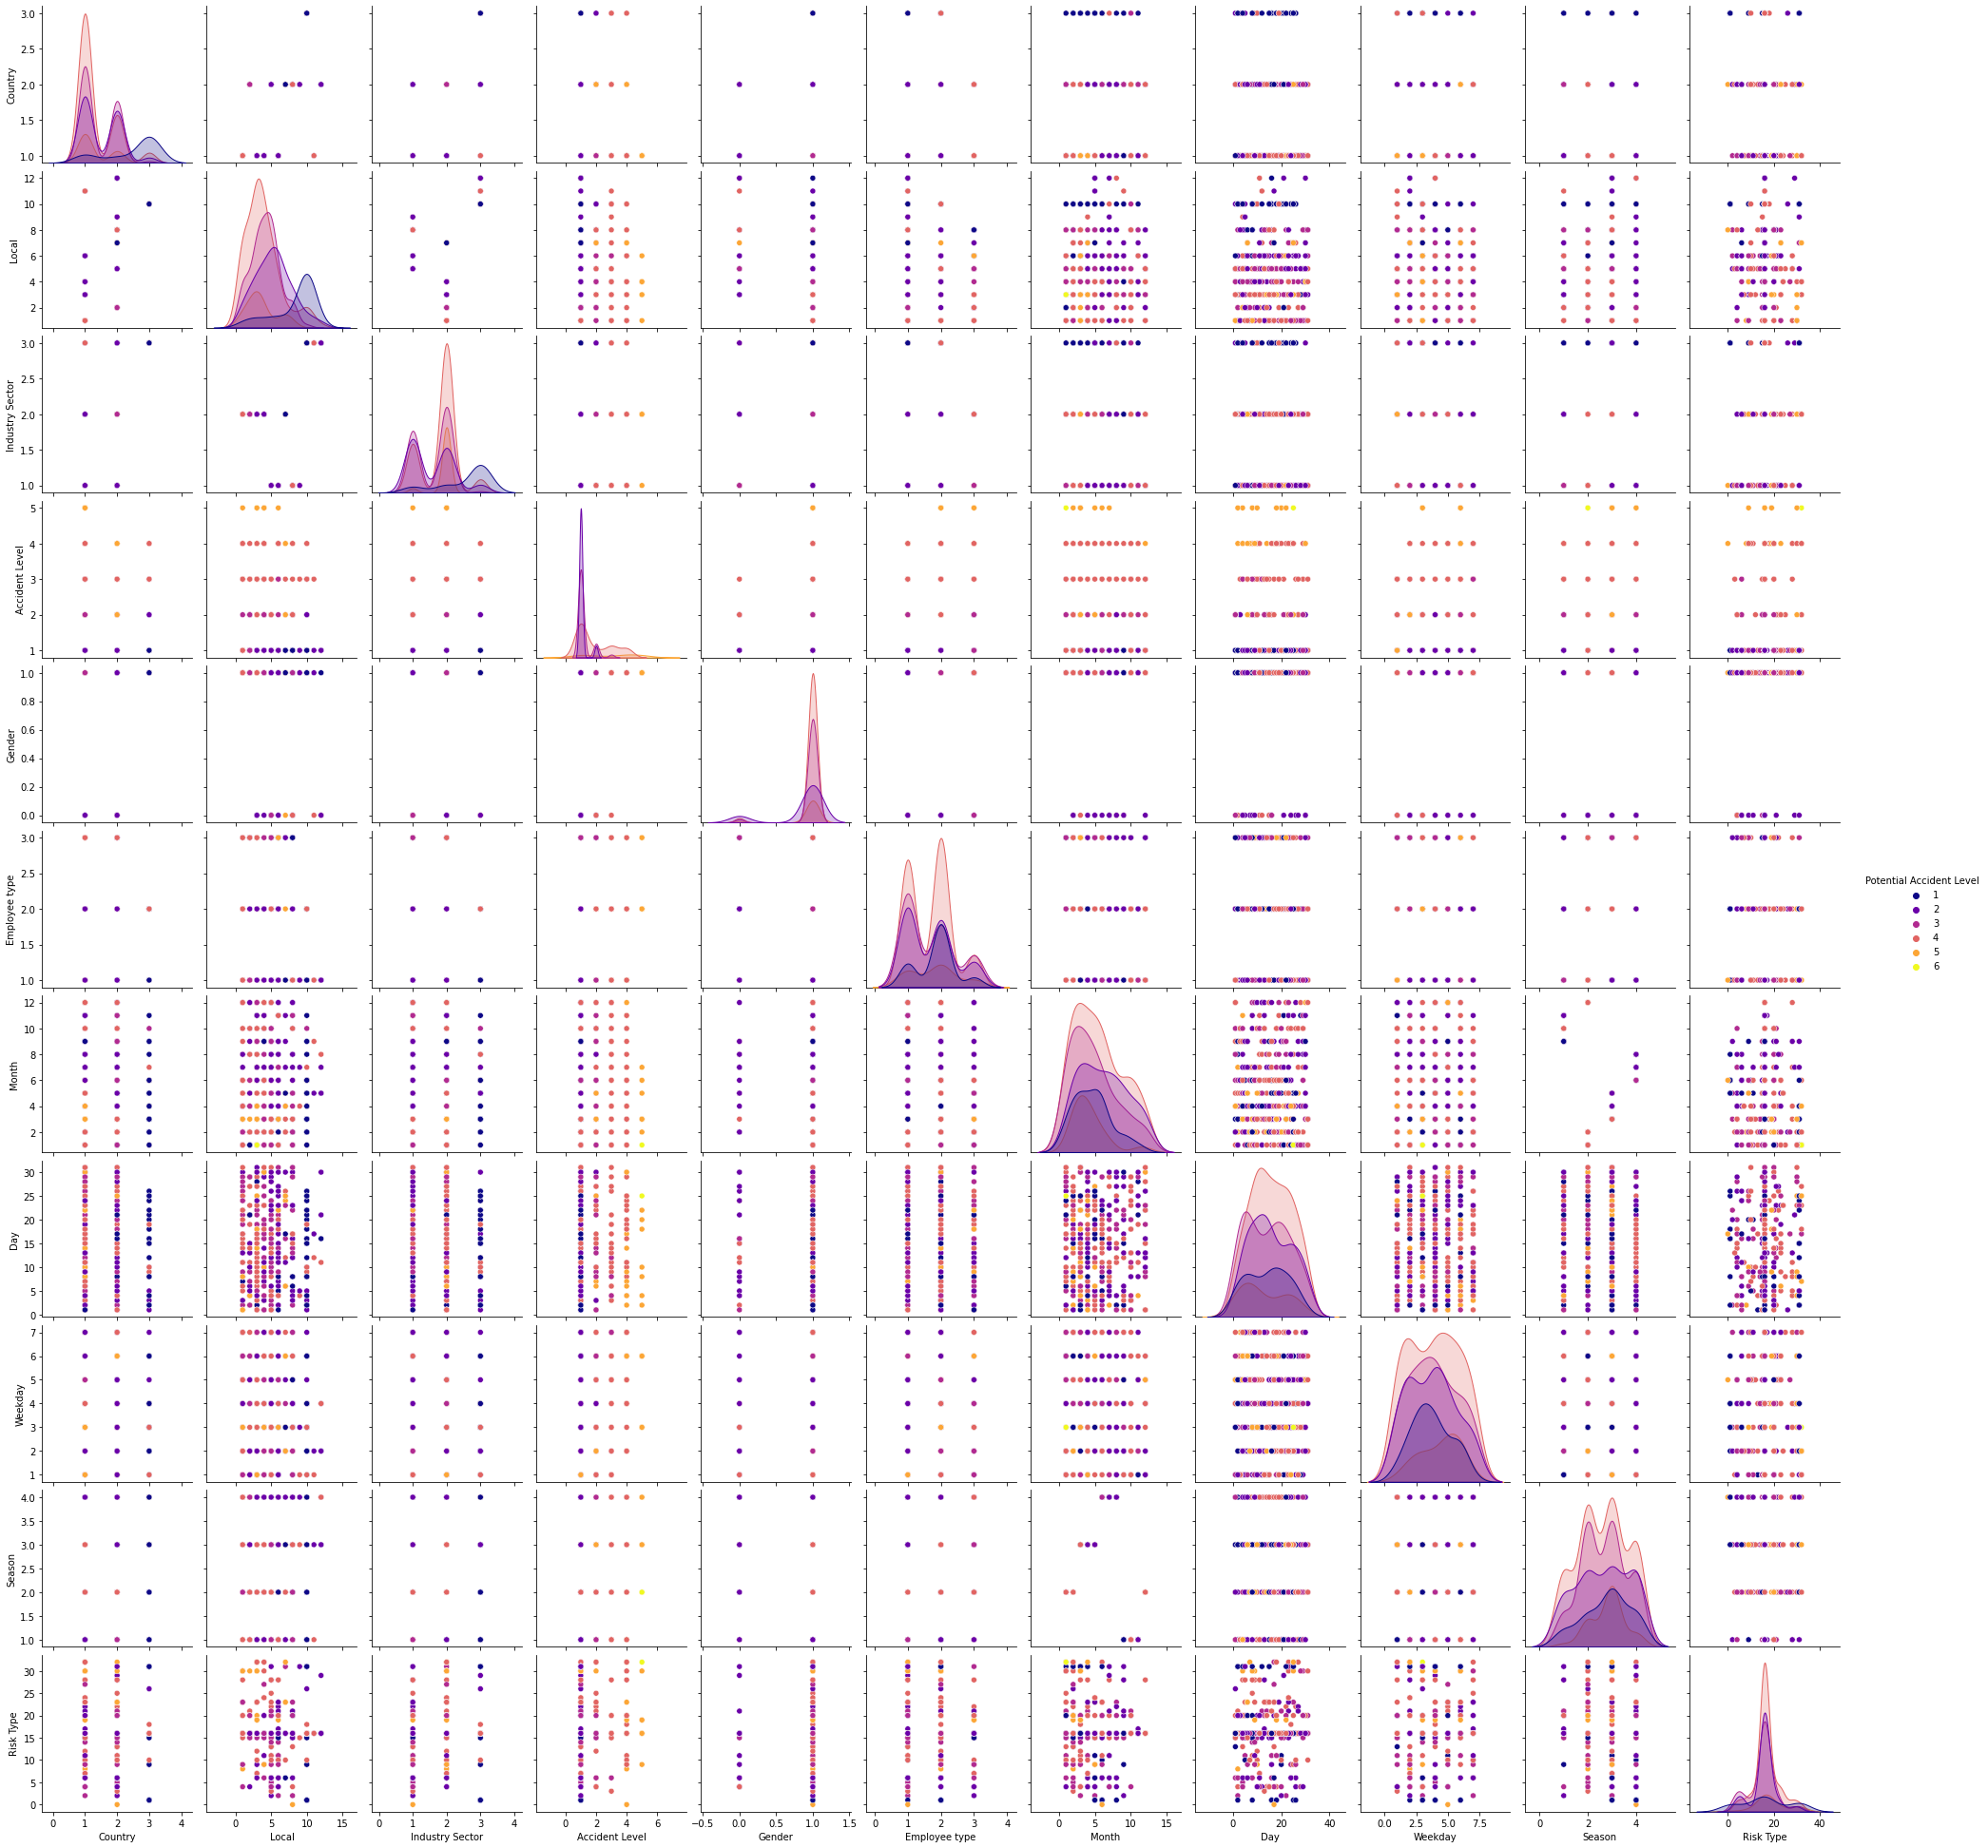

In [ ]:
plt.figure(dpi=120)
sns.pairplot(df_accidents_plot, hue='Potential Accident Level', diag_kind='kde', palette = 'plasma')
plt.show()

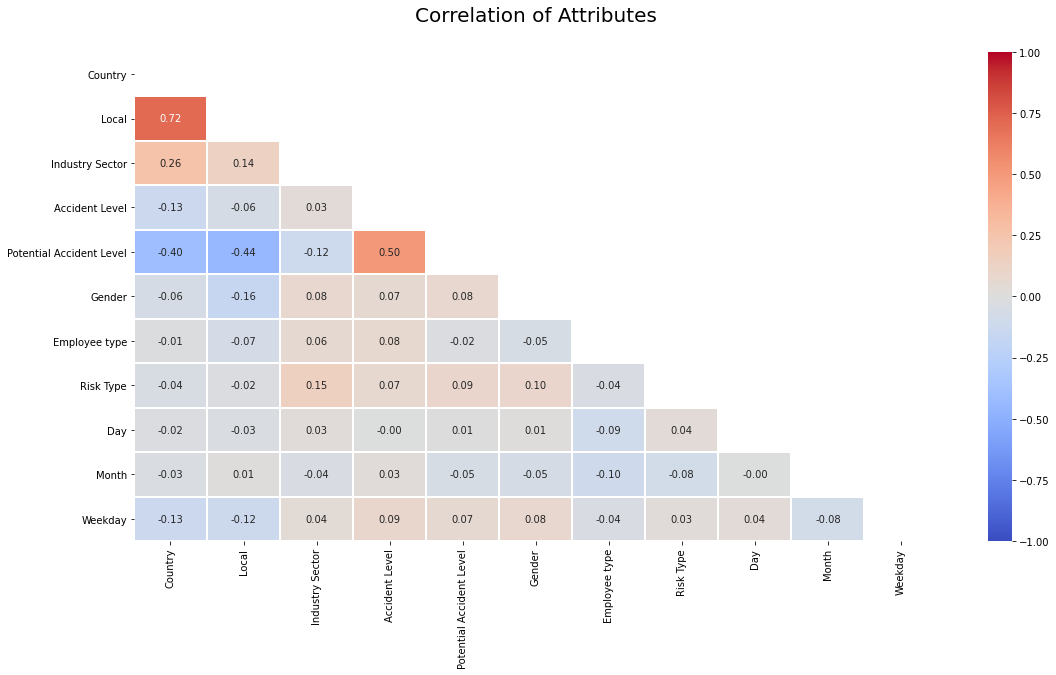

In [15]:
corr = df_accidents_plot.loc[:, ['Country', 'Local', 'Industry Sector', 'Accident Level', 
                                       'Potential Accident Level', 'Gender', 'Employee type', 
                                       'Risk Type', 'Day', 'Month', 'Weekday']].corr()
mask = np.triu(corr)
plt.figure(figsize = (18,9))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', mask=mask, 
            vmax=1.0, vmin=-1.0, linewidths=1, linecolor = 'white')
#sns.heatmap()
plt.show()

Observation :
Country and Local looks more correlated

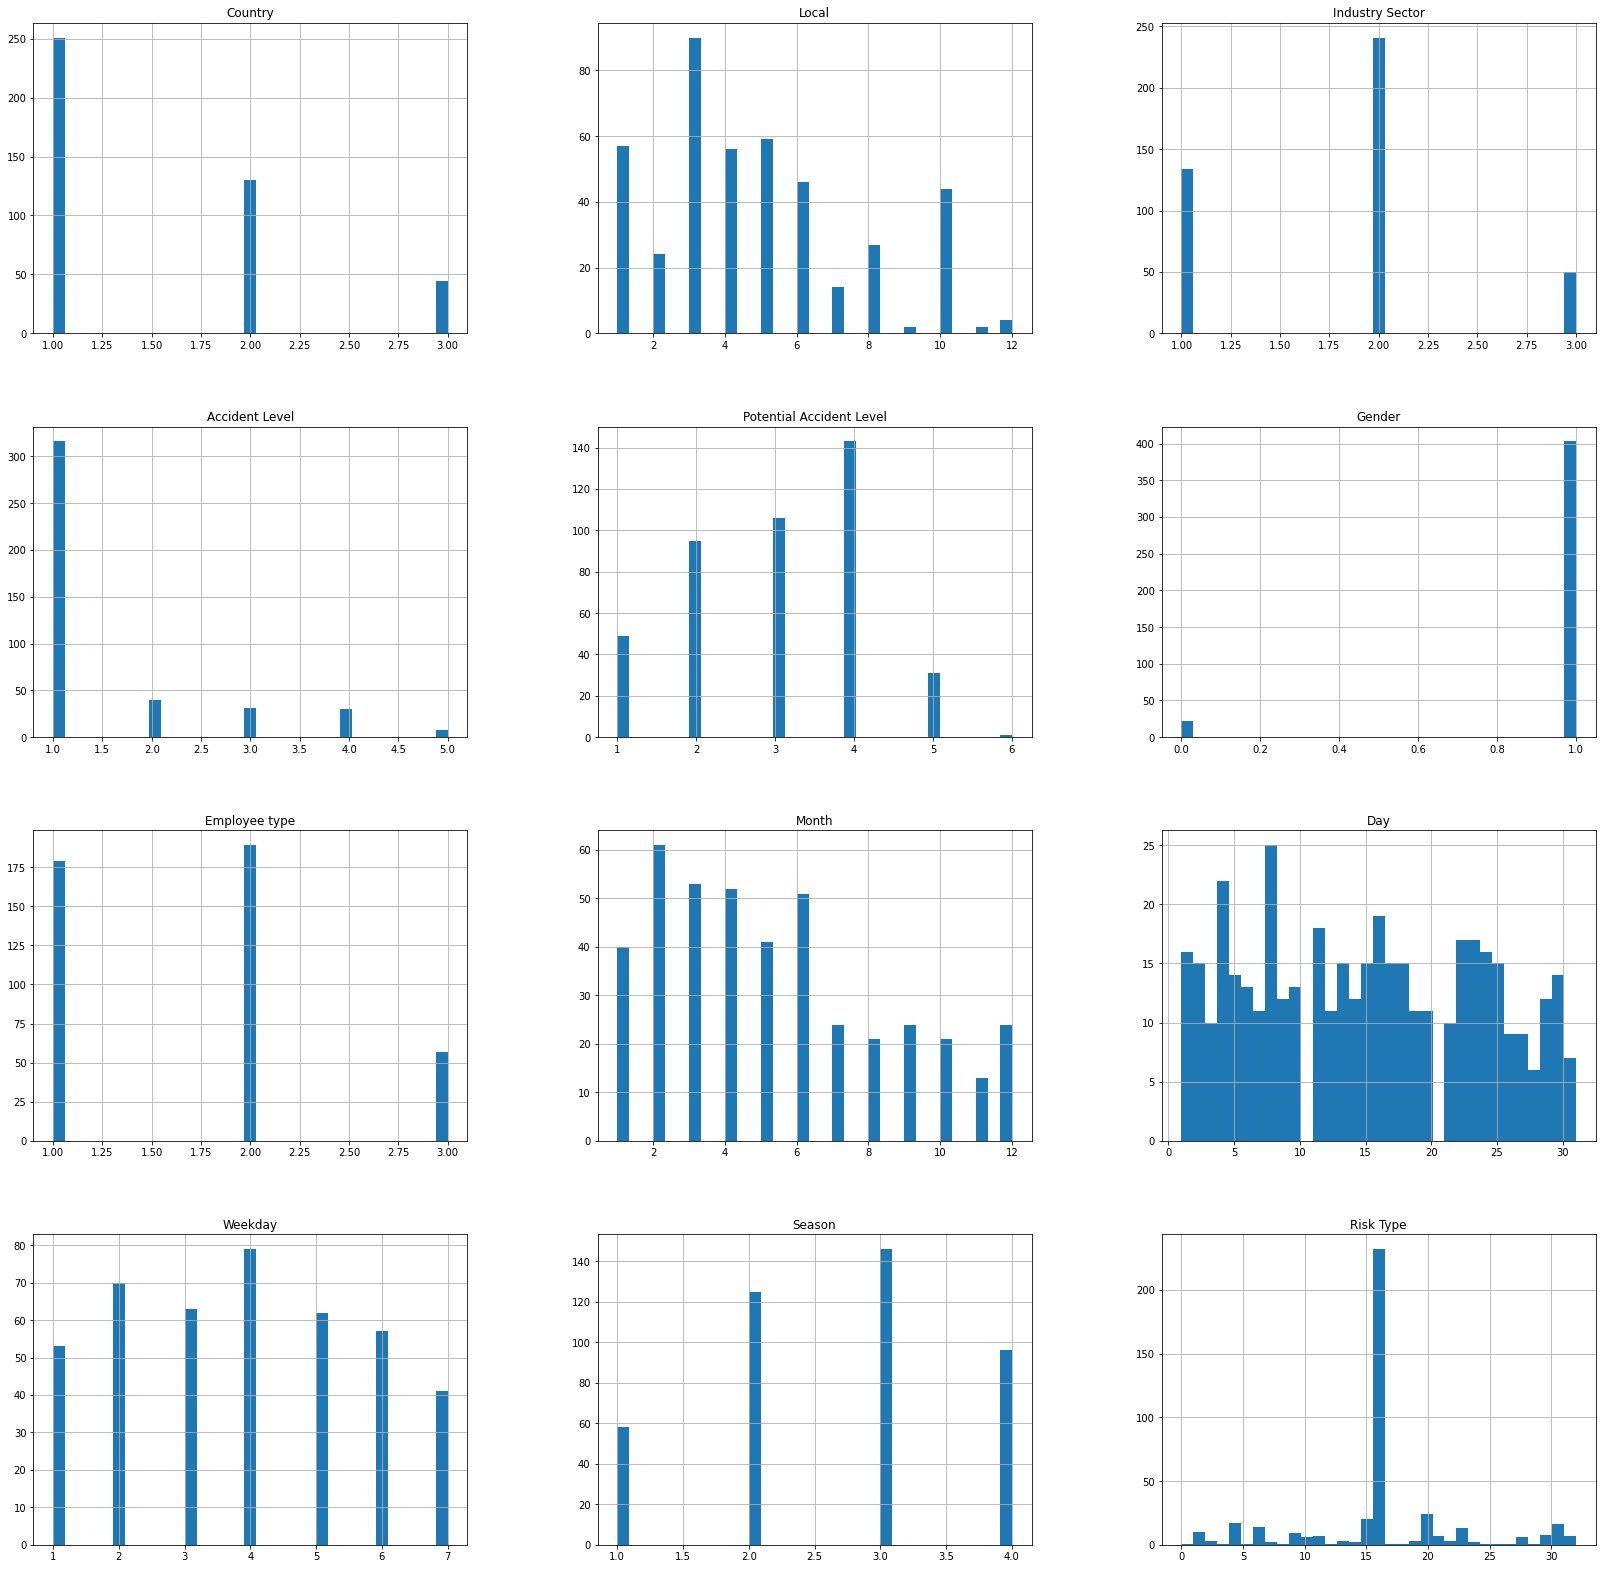

In [32]:
df_accidents_plot.hist(bins=33,figsize=(28,28));

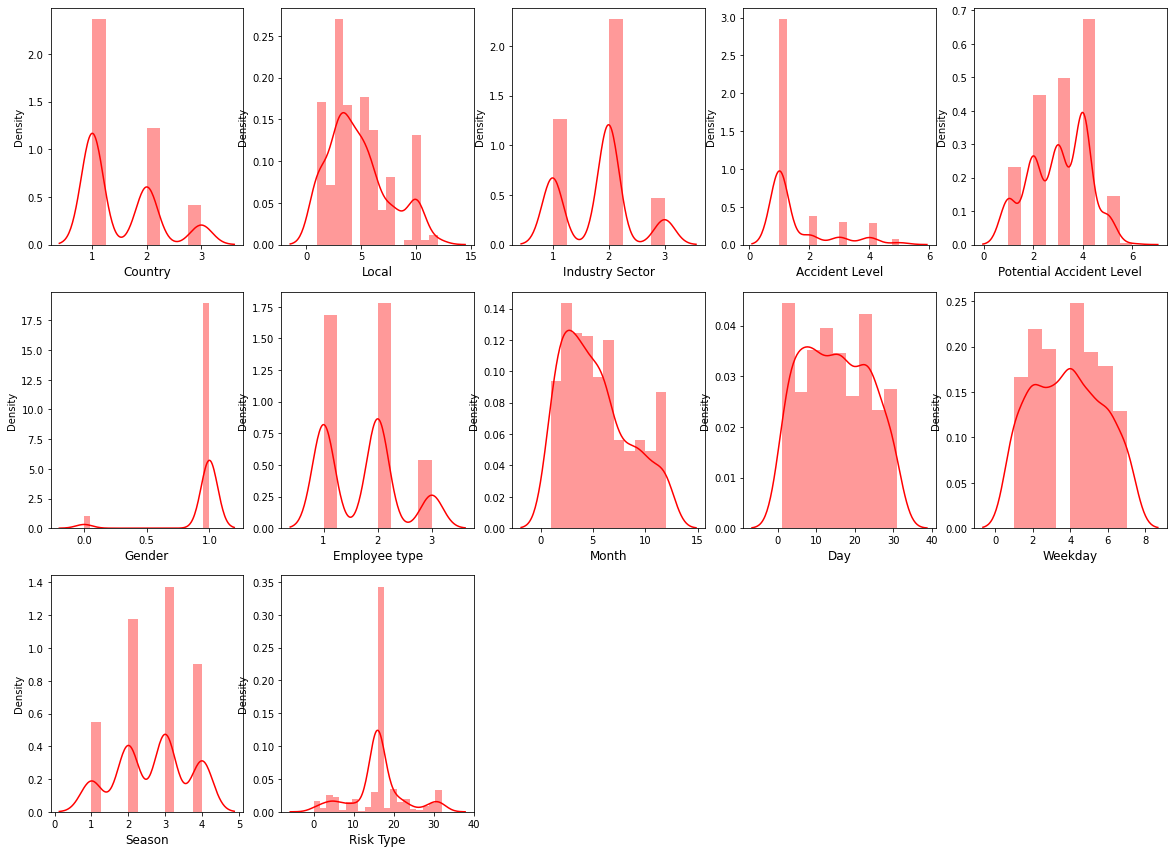

In [17]:
fig = plt.figure(figsize=(20,20)) #Plot distribution for all columns
subCnt = 1
for i in df_accidents_plot.columns:
    fig.add_subplot(4, 5, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df_accidents_plot[i], color='red')
    subCnt = subCnt + 1
plt.show()

<function matplotlib.pyplot.show>

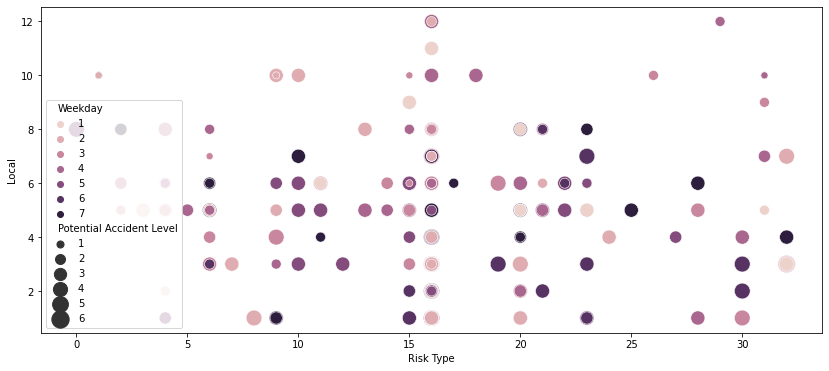

In [33]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_accidents_plot, x="Risk Type", y="Local", size="Potential Accident Level", hue='Weekday', ax=None, sizes=(50, 300))
plt.show

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Summary :
<font color=darkblue>
<ol>
    <li>Country_01 recorded the highest (59.1%) number of accidents. This is not necessarily significant as the employees in Country_01 could be more than other two Countries</li>
    <li>Male Gender recorded 94.8% of accidents compared to Female Gender with 5.2%, with no gender ratio of overall employees, this may not be significant. Could be number of Male employees are mouch more than Female employees</li>
    <li>54.6% of the accidents fall in Others category of Critical Risk, this could be due to limitations on valid options on data input/collection</li>
    <li>Third Party (44.5%) and Employee (42.1%) are prone to overall 87% of accidents</li>
    <li>Of the 12 Localities(cities), 3 localities (Local_09, Local_11 and Local_12) record very low accidents compared to other Localities. Could be these Localities have highly safe workspace. Or there could be lesser number of employees in these localities. Possibility of no proper reporting of accidents in these Localities</li>
    <li>Accident Level categorized to 6 Levels (I to VI), with I as 'not severe' and VI as 'very severe'. No acidents reported under Level VI. Level V (8) is reported with least number of accidents and 75% of accidents reported under Level I</li>
    <li>Potential Accident Level categorized to 6 Levels (I to VI), with I as 'not severe' and VI as 'very severe'. 1 accident reported under Level VI and Level IV (143) is reported with more number of accidents</li>
    <li>Months of February, March, April and June record the most accidents and Thursday record the highest number of accidents</li>
</ol>
</font>
<br>

# Feature Extraction & PCA

- As per the project requirement , we have to find out the safety risk levels.
- Potential accident level is depending on not only accident levels but it also considers other factors involved.
- From industrial knowledge, to predict the safety risk , we have to find out the 'potential' accident level.
- From the given data, based on above univariate and multivariate analysis ,  we can say that safety risk level will be proportional to potential accident level. 
- Hence for this project we are taking 'potential accident level' as our target.


In [34]:
from scipy.stats import zscore

# To split the data for its training and validation
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction
import sklearn.feature_selection
from sklearn.decomposition import PCA

# Regression models
from sklearn.tree import DecisionTreeClassifier

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve

In [35]:
df_ftr = df_accidents_plot

In [50]:
df4PAL = df_ftr.drop(['Potential Accident Level'], axis=1)
y_PAL = df_ftr[['Potential Accident Level']]

In [51]:
# convert the features to zscores
df4PAL = df4PAL.apply(zscore)

In [52]:
# find the covariance matirix 
covMatrix_PAL = np.cov(df4PAL,rowvar=False)

In [53]:
# print the covariance matirix 
print(covMatrix_PAL)

[[ 1.00235849  0.7194331   0.26178758 -0.13279968 -0.05851213 -0.01228495
  -0.03109829 -0.02133513 -0.12887645  0.090869   -0.04006946]
 [ 0.7194331   1.00235849  0.13932702 -0.06120246 -0.16088066 -0.06990007
   0.010349   -0.02817016 -0.11942646  0.05895346 -0.02131136]
 [ 0.26178758  0.13932702  1.00235849  0.03409607  0.07890359  0.06496025
  -0.03733452  0.02841827  0.03950457  0.09387552  0.15408199]
 [-0.13279968 -0.06120246  0.03409607  1.00235849  0.06869518  0.07819234
   0.02757805 -0.00287653  0.08960214 -0.02031106  0.07318166]
 [-0.05851213 -0.16088066  0.07890359  0.06869518  1.00235849 -0.05132165
  -0.054825    0.00810427  0.08437385 -0.04922616  0.1008399 ]
 [-0.01228495 -0.06990007  0.06496025  0.07819234 -0.05132165  1.00235849
  -0.10333335 -0.09447394 -0.03704288  0.02596324 -0.03875523]
 [-0.03109829  0.010349   -0.03733452  0.02757805 -0.054825   -0.10333335
   1.00235849 -0.00179407 -0.07920981 -0.13989304 -0.08423742]
 [-0.02133513 -0.02817016  0.02841827 -0.

In [54]:
df4PAL.shape

(425, 11)

- Covariance Analysis for Potential Accident Level:

In [55]:
pca = PCA(n_components=11)
pca.fit(df4PAL)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
# print the eigen values and eigen variance ratios
print(pca.explained_variance_)
print(pca.components_)
print(pca.explained_variance_ratio_)

[1.91296684 1.35981547 1.25062101 1.12140271 1.00982597 0.9627111
 0.88461758 0.84774008 0.7747886  0.64433618 0.25711786]
[[ 0.65060704  0.63106283  0.25641583 -0.16811864 -0.17166275 -0.02401114
  -0.01703979 -0.04168088 -0.17829483  0.13192137 -0.05650355]
 [-0.07567511  0.01886209 -0.49899494 -0.25435918 -0.37017442 -0.12837685
   0.40402107 -0.06419417 -0.38545565 -0.2344461  -0.39473825]
 [-0.06393452 -0.08455277 -0.13496471 -0.06303028 -0.24694124  0.3649327
  -0.30691005 -0.28781345  0.19581478  0.57948153 -0.47036841]
 [ 0.00377244  0.01598671 -0.11089325 -0.30058393  0.05447267 -0.63642942
  -0.01614678  0.44952918  0.40447888  0.30396383 -0.17532293]
 [ 0.03331028  0.12151445  0.1190302   0.66459303 -0.07688841 -0.06927932
   0.59200034 -0.04846263  0.30253992  0.12451713 -0.2402357 ]
 [-0.05614872 -0.00134032  0.04715491  0.17857309 -0.55018054  0.31638601
  -0.12543299  0.73234466 -0.03745361 -0.04638535  0.06571413]
 [-0.03712767  0.1791229  -0.34293433  0.2070623  -0.493

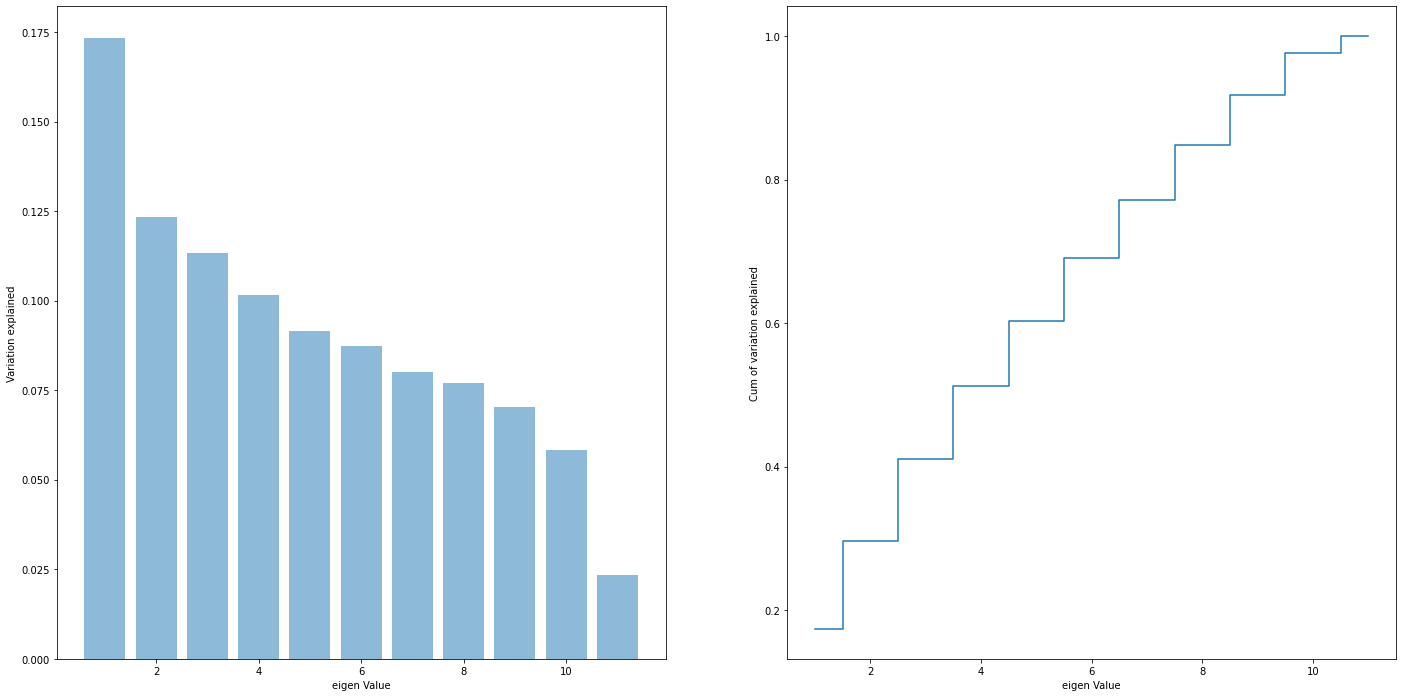

In [57]:
# plot the above values
plt.figure(figsize = (24,12))
plt.subplot(1, 2, 1)
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.subplot(1, 2, 2)
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- From above graphs we can see that each of derived principle components have less than 17% of contribution to the target

- Let us do Decision Tree for finding out feature importance:

In [58]:
X_train_split, X_val, y_train_split, y_val = train_test_split(df4PAL, y_PAL, test_size=0.3, random_state=123)
X_train_split.shape, X_val.shape, y_train_split.shape, y_val.shape

((297, 11), (128, 11), (297, 1), (128, 1))

In [59]:
# defining the DT classifier
dt_model2 = DecisionTreeClassifier()
dt_model2.fit(X_train_split , y_train_split)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [60]:
#Scores for Potential Accident Level
y_pred = dt_model2.predict(X_val)
# performance on train data

print ("Precision Score")
print ("PS_Macro ", round(precision_score(y_val, y_pred, average='macro'),4))
print ("PS_Micro ", round(precision_score(y_val, y_pred, average='micro'),4))
print ("PS_Weighted ", round(precision_score(y_val, y_pred, average='weighted'),4))

print ("\nRecall Score")
print ("RS_Macro ", round(recall_score(y_val, y_pred, average='macro'),4))
print ("RS_Micro ", round(recall_score(y_val, y_pred, average='micro'),4))
print ("RS_Weighted ", round(recall_score(y_val, y_pred, average='weighted'),4))

print ("\nAccuracy")
print ("Accuracy ", round(accuracy_score(y_val, y_pred),4))

Precision Score
PS_Macro  0.3542
PS_Micro  0.4141
PS_Weighted  0.4303

Recall Score
RS_Macro  0.3219
RS_Micro  0.4141
RS_Weighted  0.4141

Accuracy
Accuracy  0.4141


Text(0.5, 0, 'Relative Importance')

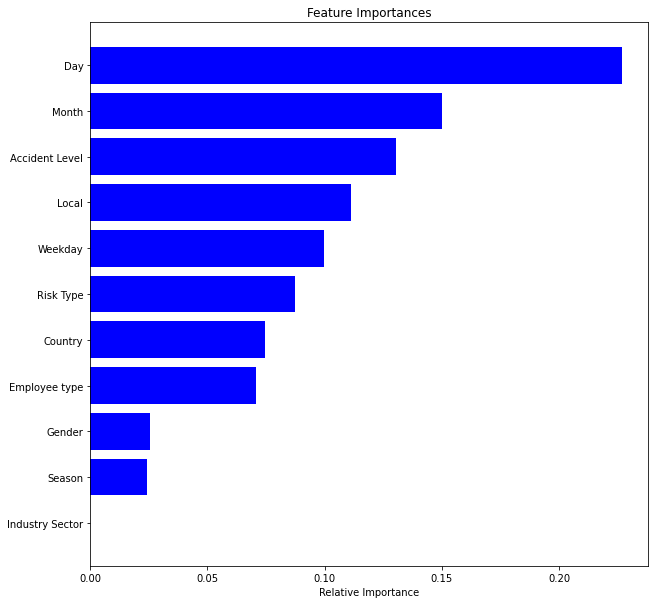

In [61]:
# View a list of the features and their importance scores
importances = dt_model2.feature_importances_
indices = np.argsort(importances)
a = df4PAL.columns
features= a

#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Observations:
 
- Feature importance values and eigen variance ratio have very low values
- Accident level values are not uniformly distributed
- Potential accident values are uniformly distributed accross categorical levels
- From above analysis it is clear that we will take potential accident level as our target label
- In the next step we will be considering text preprocessing


# NLP Pre-processing

- Analysis on Description:

In [62]:
import nltk
import plotly.express as px
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [63]:
# lets read first 3 descriptions
for i in range(3):
    print(i, "--",df["Description"][i])
    print("\n")

0 -- While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.


1 -- During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.


2 -- In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the 

In [64]:
# 
lens = df.Description.str.len()
lens.mean(), lens.std(), lens.max()

(368.28, 178.94442638944938, 1029)

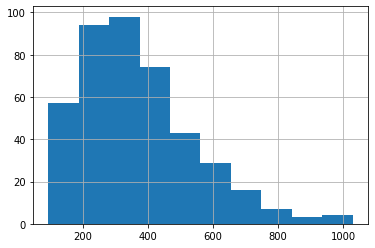

In [65]:
#Number of Characters in each Description (row):
lens.hist()

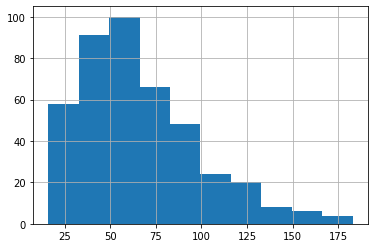

In [66]:
#Number of Words in each Description (row):
df['Description'].str.split().map(lambda x: len(x)).hist()

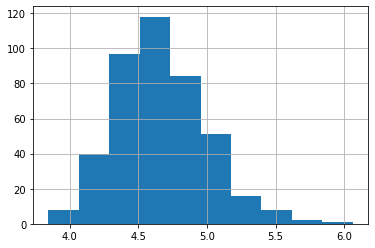

In [67]:
#Average Word length:
df['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

- As we can see the given data set is very small with 425 records is not sutiable for machine learning
- So we have decided to use an augmented dataset by combining the given dataset with similar dataset from internet
- We have used the dataset from https://www.osha.gov/severeinjury/ to get the severe injury level and occupation injury narrative
- severe injury level is based on Hospitalization feature 
- this dataset has around 59000 records so we have cleaned the dataset and reduced it to around 10K records which we will combine with our given dataset for consideration of this NLP problem
- We h 
- we have renamed the dataset as severeinjurylevel.csv 


In [68]:
# loading the dataset from https://www.osha.gov/severeinjury/
df_additional = pd.read_csv("/content/drive/MyDrive/9Capstone/severeinjurylevel.csv", encoding = 'unicode_escape')
df_additional.head()

Injury Level                                    Final Narrative
0             2  Three correctional facility guards were escort...
1             2  Employee in the Machine Shop received second d...
2             2  A truck driver fell approximately 4 feet while...
3             2  An employee's leg was pinned between a truck a...
4             2  An employee working on the Line 6 Auto-Beller ...

In [69]:
df_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9831 entries, 0 to 9830
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Injury Level     9831 non-null   int64 
 1   Final Narrative  9831 non-null   object
dtypes: int64(1), object(1)
memory usage: 153.7+ KB


In [70]:
df_additional['Injury Level'].unique()

array([2, 1, 3, 4, 5, 6])

In [71]:
df_additional.isnull().sum()

Injury Level       0
Final Narrative    0
dtype: int64

In [72]:
df_additional.isna().values.any()

False

In [73]:
df1 = df

In [74]:
df1['input_text'] = df1[['Critical Risk', 'Description']].agg(' '.join, axis=1)

In [75]:
df2= df1.drop(['Date','Country','Local','Industry Sector','Accident Level', 'Gender', 'Employee type', 'Critical Risk', 'Description','Year','Month','Day','WeekofYear','Weekday','MonthName','Season'], axis = 1)
df2.head()

Potential Accident Level                                         input_text
0                       IV  Pressed While removing the drill rod of the Ju...
1                       IV  Pressurized Systems During the activation of a...
2                      III  Manual Tools In the sub-station MILPO located ...
3                        I  Others Being 9:45 am. approximately in the Nv....
4                       IV  Others Approximately at 11:45 a.m. in circumst...

In [76]:
cleanup_labels = {"Potential Accident Level" : {"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5, "VI": 6}}
df3 = df2.replace(cleanup_labels)

df3.rename(columns = {'Potential Accident Level':'Level'}, inplace = True) 
df_additional.rename(columns = {'Injury Level':'Level', 'Final Narrative':'input_text'}, inplace = True) 

In [77]:
df3.head(1)

Level                                         input_text
0      4  Pressed While removing the drill rod of the Ju...

In [78]:
df_additional.head(1)

Level                                         input_text
0      2  Three correctional facility guards were escort...

In [79]:
# combined augmented dataset df_main = df3 + df_additional
df_main = pd.concat([df3, df_additional], ignore_index=True, sort=False)

In [80]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10256 entries, 0 to 10255
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Level       10256 non-null  int64 
 1   input_text  10256 non-null  object
dtypes: int64(1), object(1)
memory usage: 160.4+ KB


In [81]:
# import libraries for nlp
import re
import string
import nltk
from nltk import tokenize,stem,corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [82]:
stop = set(stopwords.words('english'))

In [83]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [84]:
import unicodedata 
def remove_accented_chars(text):    # function to remove accented characters
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

In [85]:
    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    stemmer = stem.PorterStemmer()

In [86]:
def nlp_preprocesser(row):
    sentence = remove_accented_chars(row)

    sentence0  = re.sub('[^a-zA-Z0-9]', ' ', sentence)     # removes unwanted characters 

    sentence1 = re.sub('  +', ' ',sentence0).strip()      #remove unwanted spaces   

    sentence2 = remove_punctuation(sentence1)       #remove punctuations

    sentence3 = sentence2.replace("\n"," ")         #removes new line character
              
    sentence4 = sentence3.lower()                   #convert all words to lowercase    

    tok = tokenize.word_tokenize(sentence4)         #convert sentences to tokens

    # tok = sentence4.split()

    # stems = [stemmer.stem(i) for i in tok if i not in stop]

    lems = [lemmatizer.lemmatize(i) for i in tok if i not in stop]
    
    #argument to includes only alphabet characters since numbers are not adding value
    alpha = [i for i in lems if i.isalpha() and (i not in stop)]
    row = " ".join(alpha)

    row = re.sub(r'\b\w{1,2}\b', '', row)

    row = re.sub(r'\s+', ' ', row)

    # row = " ".join(lems)

    return row

In [87]:
df_main['input_text_clean'] = df_main['input_text'].apply(nlp_preprocesser)
print(df_main.input_text[435])
print("------------------")
print(df_main.input_text_clean[435])

An employee was struck by an excavator on 01/02/2015 and hospitalized for injuries to his leg, several broken bones in his foot, and a fracture in his left arm.
------------------
employee struck excavator hospitalized injury leg several broken bone foot fracture left arm


In [88]:
df_main.drop(['input_text'], axis = 1, inplace = True)
df_main.head()

Level                                   input_text_clean
0      4  pressed removing drill rod jumbo maintenance s...
1      4  pressurized system activation sodium sulphide ...
2      3  manual tool sub station milpo located level co...
3      1  others approximately personnel begin task unlo...
4      4  others approximately circumstance mechanic ant...

#### Analysis on N-Grams:

In [89]:
def gen_ngram(ngram, top_count=10, col='', col_value=''):
    if (col == '') or (col_value == ''):
        string_filterd =  df_main['input_text_clean'].sum().split()
    else:
        string_filterd =  df_main[df_main[col].isin(col_value)]['input_text_clean'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df['ngram'] = [' '.join(i) for i in ngram_df.ngram]
    #ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    #ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df[:top_count]

In [90]:
def plot_ngram(ngram=2, top_count=10, col='', col_value=''):
    x = gen_ngram(ngram, top_count, col, col_value)
    y = x['count']
    x = x['ngram']
    
    if ngram == 1:
        aTitle = 'Top ' + str(top_count) + ' Unigram Count'
    elif ngram == 2:
        aTitle = 'Top ' + str(top_count) + ' Bigram Count'
    elif ngram == 3:
        aTitle = 'Top ' + str(top_count) + ' Trigram Count'
    else:
        aTitle = 'Top ' + str(top_count) + ' Bigram Count'
    
    plt.figure(figsize=(12,5))
    plt.title(aTitle, fontsize=14)
    ax = sns.barplot(x=y,y=x)
    plt.show()

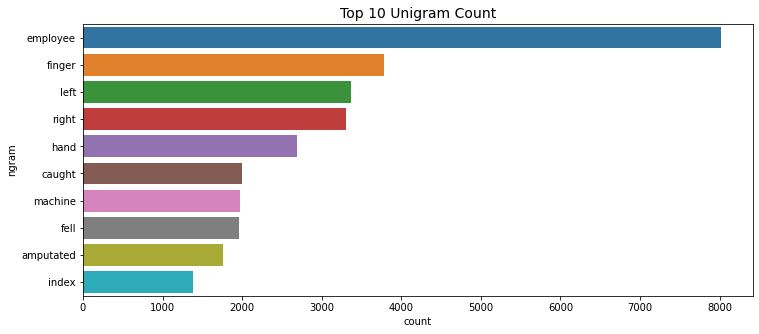

In [91]:
# Unigram
plot_ngram(1,10)

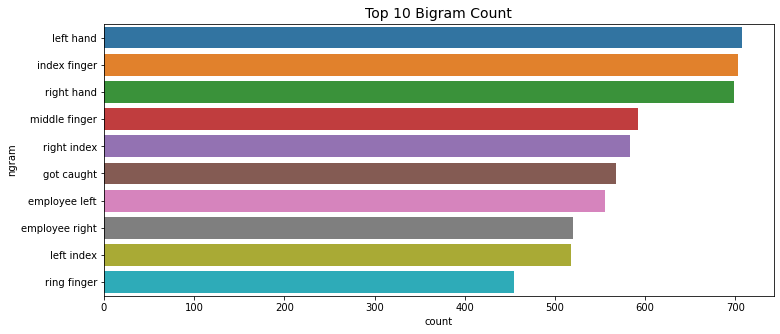

In [92]:
# Bigram
plot_ngram(2,10)

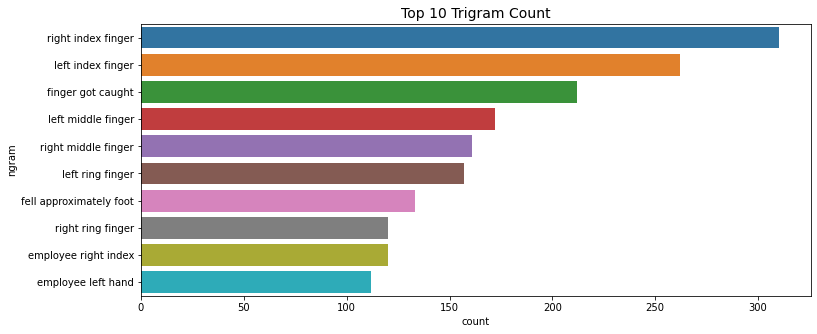

In [93]:
# Trigram
plot_ngram(3,10)

## NLP Feature Engineering

### NLP Dataset preparation

In [100]:
text = df_main['input_text_clean']
label = df_main['Level']

In [101]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(text, label)

### Count Vectors as features

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(text)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

### TF-IDF Vectors as features

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

- a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents
- b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
- c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=50000)
tfidf_vect.fit(text)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=50000)
tfidf_vect_ngram.fit(text)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=50000)
tfidf_vect_ngram_chars.fit(text)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

### Word Embeddings

- Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings such as Glove, FastText, and Word2Vec.

In [ ]:
################################################## DO not look below ###########################################################################